In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
ruta = r"C:\Users\lenovo\Desktop\Phishing Domain Detection\Phishing Domain Detection\Data\dataset_cybersecurity_michelle.csv"
df = pd.read_csv(ruta)
print(df.head())

   qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            1               0                  0              1   
1            2               5                  4              2   
2            2               0                  0              0   
3            1               1                  0              2   
4            2               1                  0              0   

   qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                     0              0           0            0   
1                     0              0           0            0   
2                     0              0           0            0   
3                     0              0           0            0   
4                     0              0           0            0   

   qty_exclamation_url  qty_space_url  ...  qty_ip_resolved  qty_nameservers  \
0                    0              0  ...                2                2   
1                    0      

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129698 entries, 0 to 129697
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 110.8 MB
None


In [5]:
print(df["phishing"].value_counts(normalize=True))

phishing
0    0.597897
1    0.402103
Name: proportion, dtype: float64


In [6]:
print(df.isnull().sum())

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64


In [7]:
for column in df.columns:
    print(column)

qty_dot_url
qty_hyphen_url
qty_underline_url
qty_slash_url
qty_questionmark_url
qty_equal_url
qty_at_url
qty_and_url
qty_exclamation_url
qty_space_url
qty_tilde_url
qty_comma_url
qty_plus_url
qty_asterisk_url
qty_hashtag_url
qty_dollar_url
qty_percent_url
qty_tld_url
length_url
qty_dot_domain
qty_hyphen_domain
qty_underline_domain
qty_slash_domain
qty_questionmark_domain
qty_equal_domain
qty_at_domain
qty_and_domain
qty_exclamation_domain
qty_space_domain
qty_tilde_domain
qty_comma_domain
qty_plus_domain
qty_asterisk_domain
qty_hashtag_domain
qty_dollar_domain
qty_percent_domain
qty_vowels_domain
domain_length
domain_in_ip
server_client_domain
qty_dot_directory
qty_hyphen_directory
qty_underline_directory
qty_slash_directory
qty_questionmark_directory
qty_equal_directory
qty_at_directory
qty_and_directory
qty_exclamation_directory
qty_space_directory
qty_tilde_directory
qty_comma_directory
qty_plus_directory
qty_asterisk_directory
qty_hashtag_directory
qty_dollar_directory
qty_percent_

In [8]:
print(f"\nNúmero total de columnas: {len(df.columns)}")


Número total de columnas: 112


Vamos a estructurar el DataSet en distintos bloques para su analisis.

1. Características relacionasas con la estructura URL
2. Características relacionadas con el Dominio
3. Características relacionasas con el archivo
4. Características de los parámetros
5. otras características

Vamos a examinar la distribución de las características para URLs de phishing vs. no phishing. Primero, necesitamos separar nuestros datos en estos dos grupos y luego comparar algunas características clave.

In [9]:
# Separar los datos en phishing y no phishing
phishing = df[df['phishing'] == 1]
non_phishing = df[df['phishing'] == 0]

In [10]:
# Función para crear histogramas comparativos
def plot_histogram(feature):
    plt.figure(figsize=(10, 6))
    plt.hist(phishing[feature], bins=50, alpha=0.5, label='Phishing')
    plt.hist(non_phishing[feature], bins=50, alpha=0.5, label='No Phishing')
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

In [11]:
# Características a examinar
features_to_examine = ['length_url', 'qty_dot_url', 'domain_length', 'qty_hyphen_domain', 
                       'qty_params', 'time_response', 'qty_ip_resolved', 'qty_nameservers']

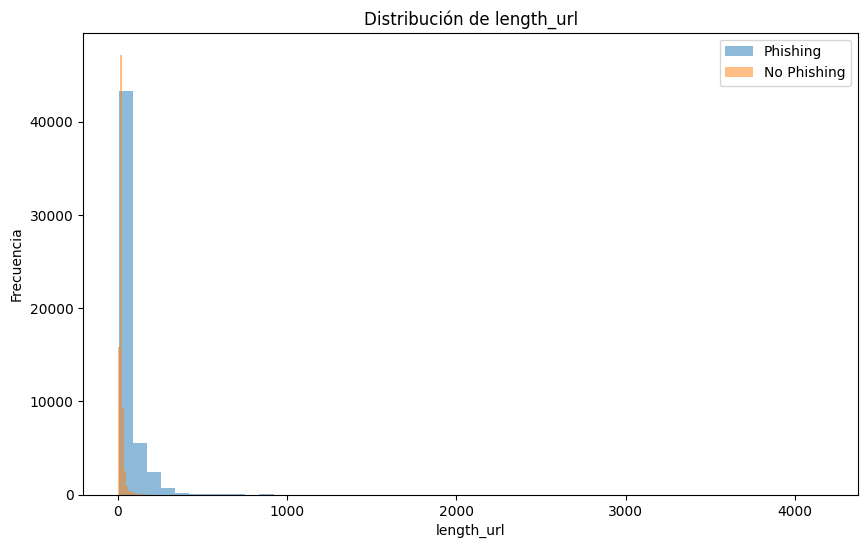

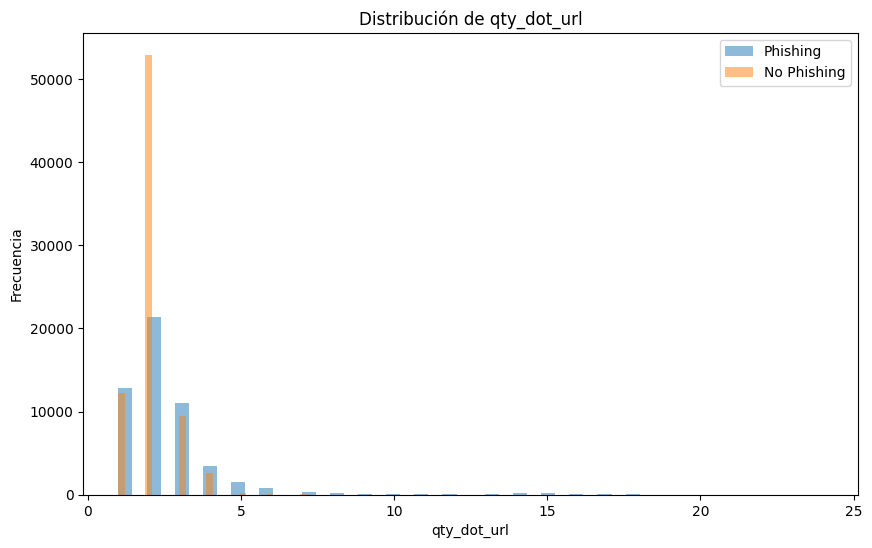

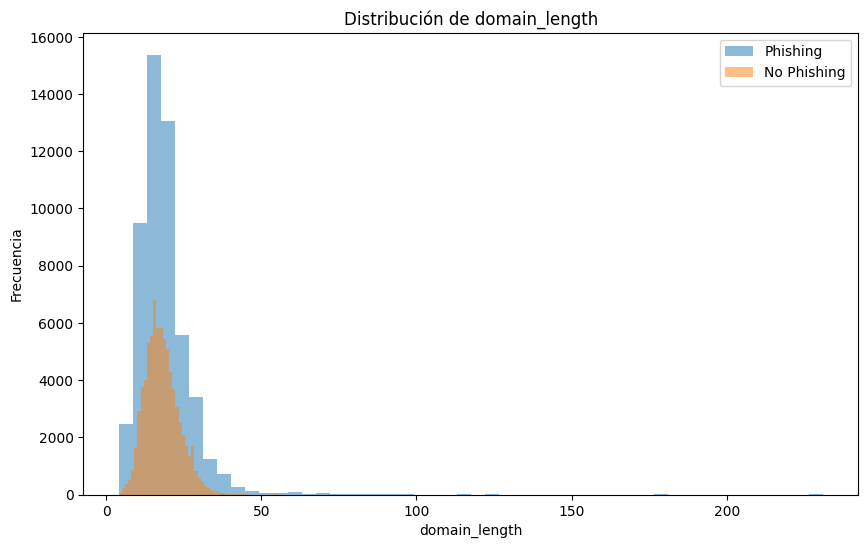

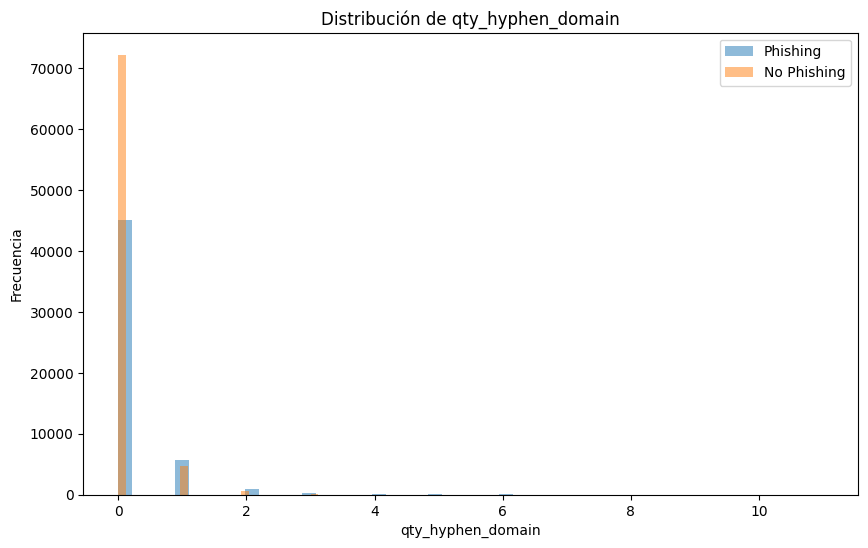

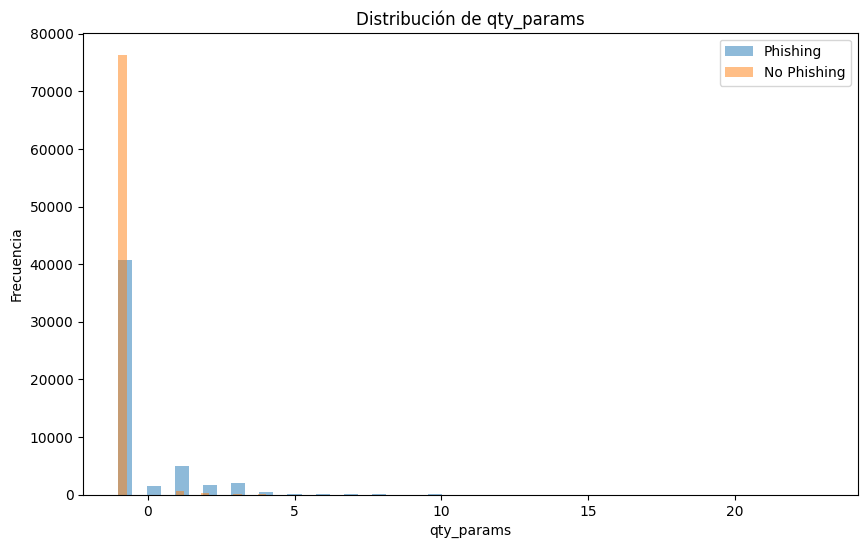

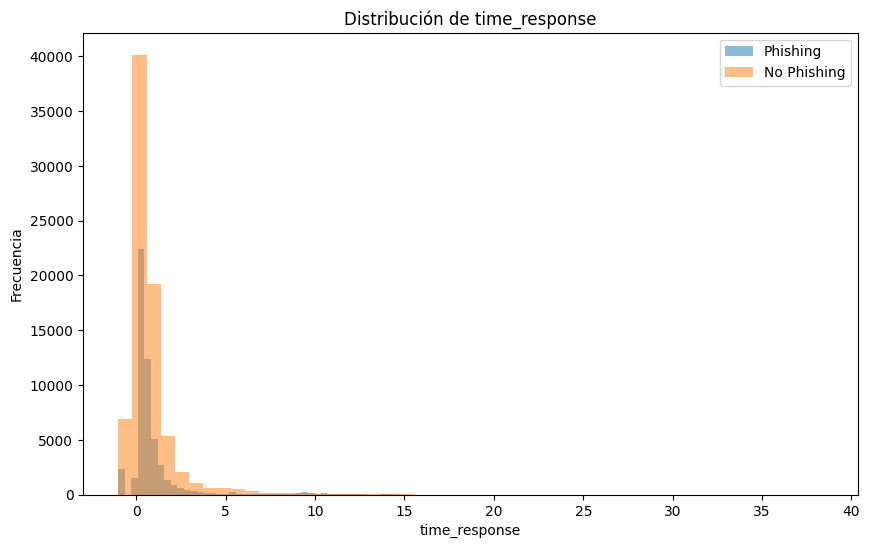

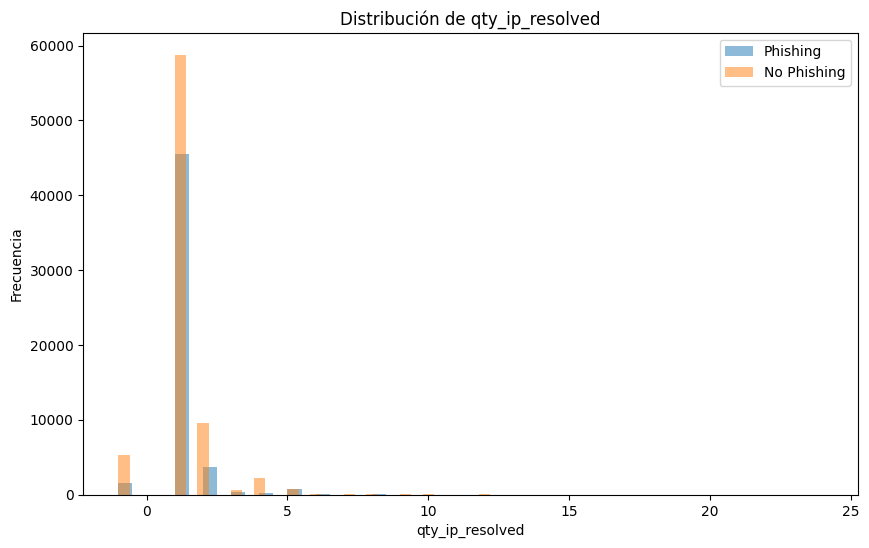

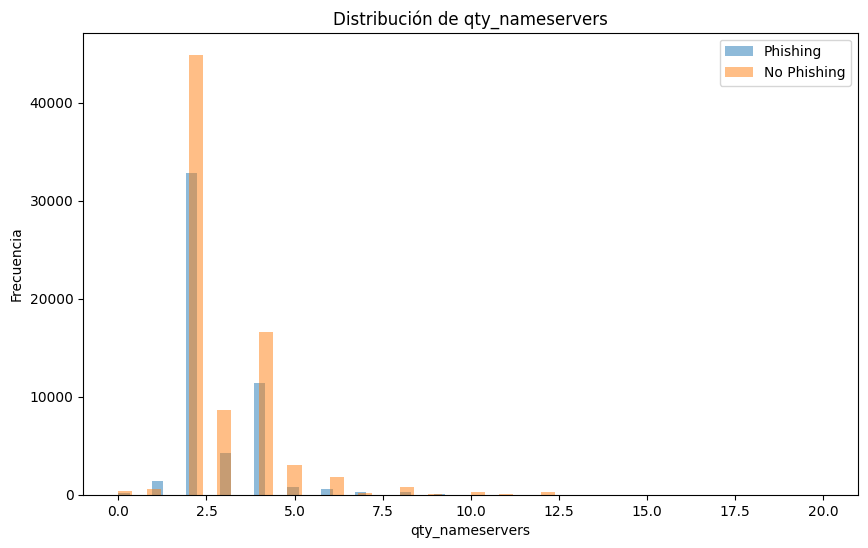

In [12]:
# Crear histogramas para cada característica
for feature in features_to_examine:
    plot_histogram(feature)

<Figure size 2000x1500 with 0 Axes>

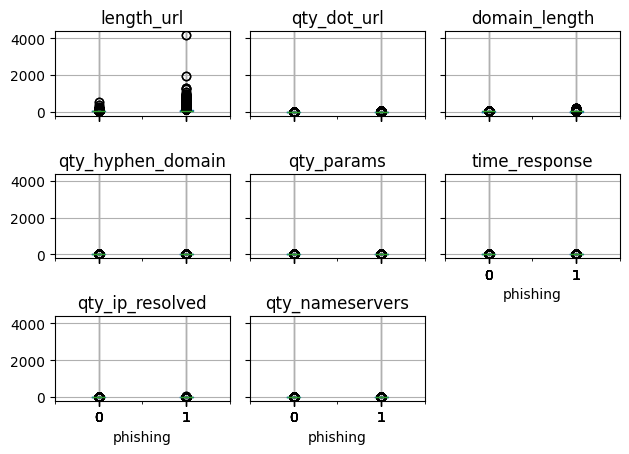

In [13]:
# Crear un boxplot para comparar múltiples características
plt.figure(figsize=(20, 15))
df.boxplot(column=features_to_examine, by='phishing')
plt.title('Comparación de características: Phishing vs No Phishing')
plt.suptitle('')  # This removes the automatic suptitle
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Calcular y mostrar estadísticas descriptivas
print("Estadísticas para URLs de Phishing:")
print(phishing[features_to_examine].describe())
print("\nEstadísticas para URLs No Phishing:")
print(non_phishing[features_to_examine].describe())

Estadísticas para URLs de Phishing:
         length_url   qty_dot_url  domain_length  qty_hyphen_domain  \
count  52152.000000  52152.000000   52152.000000       52152.000000   
mean      64.952255      2.481995      18.645728           0.182563   
std       69.085050      1.871549       8.566074           0.567082   
min        5.000000      1.000000       4.000000           0.000000   
25%       31.000000      2.000000      14.000000           0.000000   
50%       47.000000      2.000000      17.000000           0.000000   
75%       72.000000      3.000000      22.000000           0.000000   
max     4165.000000     24.000000     231.000000          11.000000   

         qty_params  time_response  qty_ip_resolved  qty_nameservers  
count  52152.000000   52152.000000     52152.000000     52152.000000  
mean      -0.366295       0.857725         1.101530         2.652132  
std        1.454398       1.640401         0.746161         1.163092  
min       -1.000000      -1.000000      

Observaciones:
1. Longitud de URL (length_url):

- Las URLs de phishing tienden a ser más largas y tienen una distribución más amplia.
- Las URLs no phishing son generalmente más cortas y tienen una distribución más concentrada.
- Hay un claro outlier en las URLs de phishing con longitudes extremadamente largas

2. Cantidad de puntos en la URL(qty_dot_url):

- Las URLs no phishing muestran una alta frecuencia de exactamente dos puntos, lo que probablemente corresponde al formato típico "www.dominio.com".
- Las URLs de phishing tienen una distribución más variada, con más instancias de múltiples puntos.

3. Longitud del dominio (domain_length):

- Los dominios de phishing tienden a ser más largos.
- Hay una diferencia notable en la frecuencia, con dominios de phishing mostrando una distribución más amplia.

4. Cantidad de guiones en el dominio (qty_hyphen_domain):

- Las URLs no phishing tienen una mayor frecuencia de no usar guiones en absoluto.
- Las URLs de phishing tienden a usar más guiones, lo que podría ser un intento de crear nombres de dominio que parezcan legítimos.

5. Cantidad de parámetros (qty_params):

- Las URLs de phishing tienen una mayor frecuencia de usar uno o más parámetros.
- Las URLs no phishing tienden a usar menos parámetros o ninguno.

6. Observaciones de las Características:

- La media de length_url para phishing (64.95) es significativamente mayor que para no phishing (21.71).
- La desviación estándar de length_url para phishing (69.09) es mucho mayor que para no phishing (13.49), indicando una mayor variabilidad.
- La media de qty_hyphen_domain para phishing (0.18) es mayor que para no phishing (0.08).
- La media de qty_params para phishing (-0.37) es mayor que para no phishing (-0.96), indicando un mayor uso de parámetros en URLs de phishing.

Estas diferencias sugieren varias estrategias que los creadores de phishing podrían estar utilizando:

Usar URLs más largas y complejas para ocultar la naturaleza maliciosa.
Emplear más subdominios o parámetros para imitar estructuras de URL legítimas.
Utilizar nombres de dominio más largos y con más guiones, posiblemente para imitar nombres de marcas conocidas.


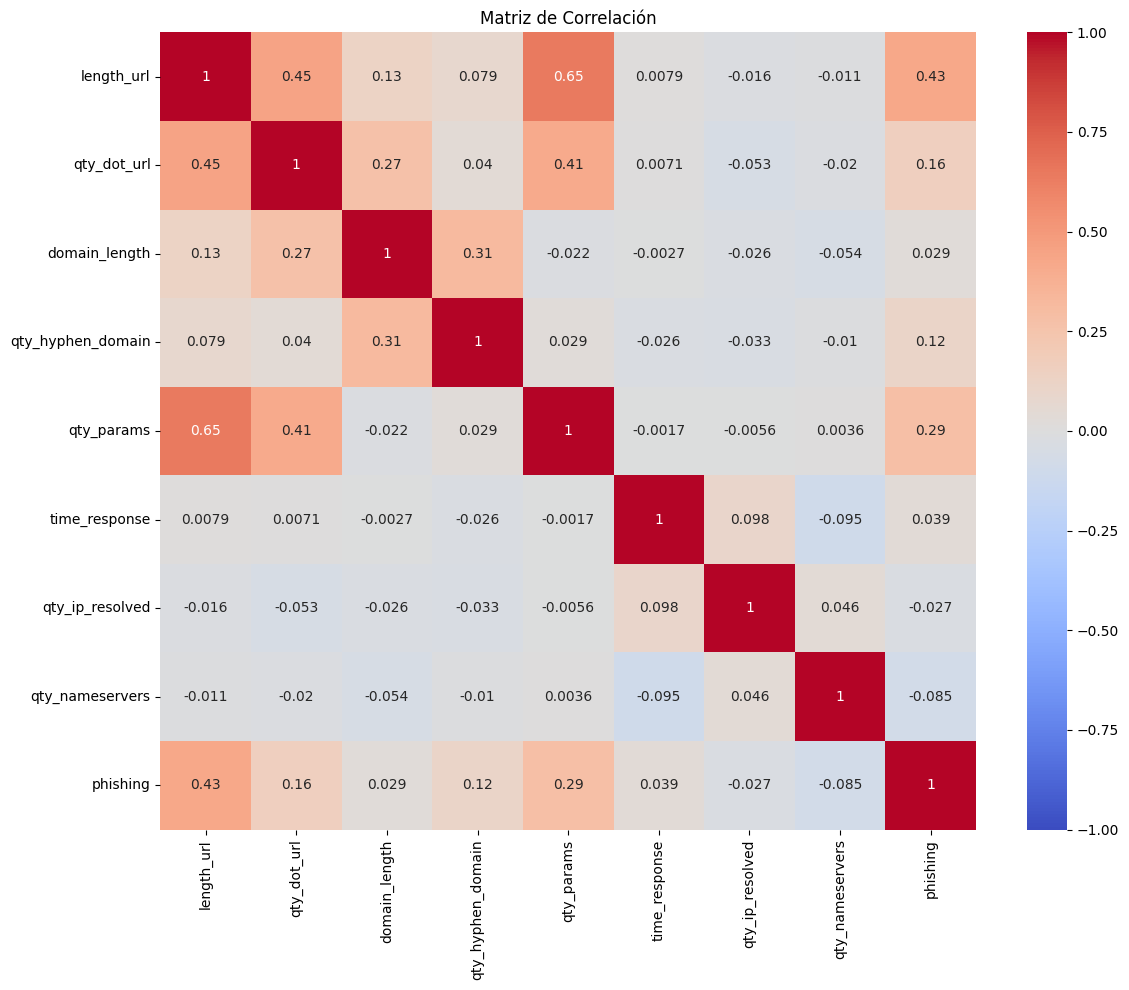

                   length_url  qty_dot_url  domain_length  qty_hyphen_domain  \
length_url           1.000000     0.448663       0.130119           0.079104   
qty_dot_url          0.448663     1.000000       0.270206           0.039772   
domain_length        0.130119     0.270206       1.000000           0.314358   
qty_hyphen_domain    0.079104     0.039772       0.314358           1.000000   
qty_params           0.646462     0.411168      -0.021726           0.028896   
time_response        0.007933     0.007128      -0.002710          -0.025638   
qty_ip_resolved     -0.016277    -0.053114      -0.026432          -0.033016   
qty_nameservers     -0.010645    -0.020060      -0.054112          -0.010145   
phishing             0.425988     0.163043       0.029186           0.117028   

                   qty_params  time_response  qty_ip_resolved  \
length_url           0.646462       0.007933        -0.016277   
qty_dot_url          0.411168       0.007128        -0.053114   
doma

In [15]:
# Seleccionar las variables que queremos incluir en la matriz de correlación
variables = ['length_url', 'qty_dot_url', 'domain_length', 'qty_hyphen_domain', 
             'qty_params', 'time_response', 'qty_ip_resolved', 'qty_nameservers', 'phishing']

# Crear la matriz de correlación
corr_matrix = df[variables].corr()

# Crear un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

# Imprimir la matriz de correlación
print(corr_matrix)

Analisis variaboles relacionadas con el dominio.

In [16]:
# Características del dominio a examinar
domain_features = ['domain_length', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain',
                   'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain', 'qty_at_domain',
                   'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain',
                   'qty_comma_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain',
                   'qty_dollar_domain', 'qty_percent_domain', 'domain_in_ip', 'server_client_domain']

In [17]:
# Muestra la suma de valores NaN en cada característica del dominio
print(df[domain_features].isna().sum())

# Muestra el porcentaje de valores NaN en cada característica del dominio
print(df[domain_features].isna().mean() * 100)

domain_length              0
qty_dot_domain             0
qty_hyphen_domain          0
qty_underline_domain       0
qty_slash_domain           0
qty_questionmark_domain    0
qty_equal_domain           0
qty_at_domain              0
qty_and_domain             0
qty_exclamation_domain     0
qty_space_domain           0
qty_tilde_domain           0
qty_comma_domain           0
qty_plus_domain            0
qty_asterisk_domain        0
qty_hashtag_domain         0
qty_dollar_domain          0
qty_percent_domain         0
domain_in_ip               0
server_client_domain       0
dtype: int64
domain_length              0.0
qty_dot_domain             0.0
qty_hyphen_domain          0.0
qty_underline_domain       0.0
qty_slash_domain           0.0
qty_questionmark_domain    0.0
qty_equal_domain           0.0
qty_at_domain              0.0
qty_and_domain             0.0
qty_exclamation_domain     0.0
qty_space_domain           0.0
qty_tilde_domain           0.0
qty_comma_domain           0.0
qty_

In [18]:
# Función para crear histogramas comparativos
def plot_histogram(feature):
    plt.figure(figsize=(10, 6))
    plt.hist(phishing[feature], bins=50, alpha=0.5, label='Phishing')
    plt.hist(non_phishing[feature], bins=50, alpha=0.5, label='No Phishing')
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

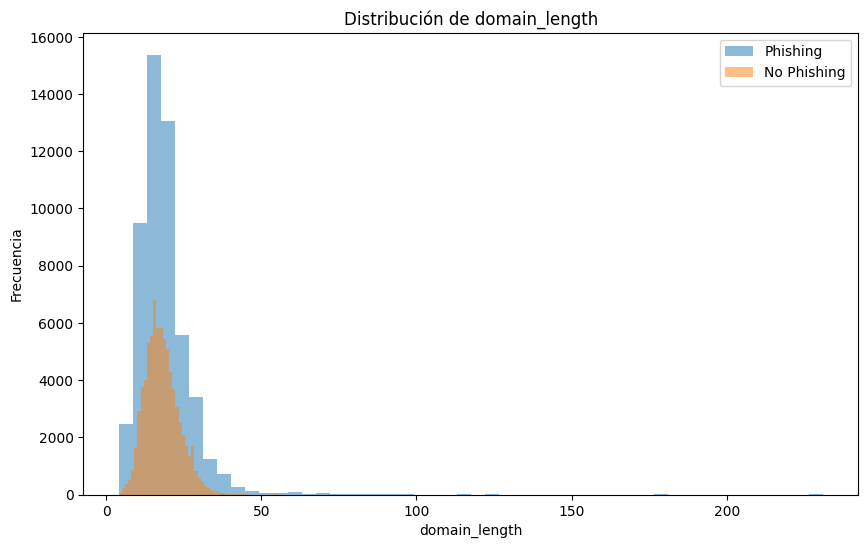

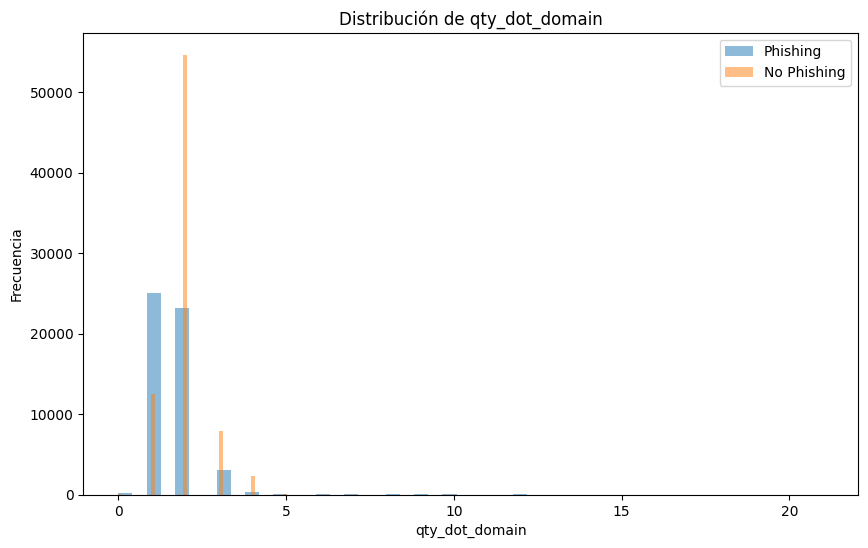

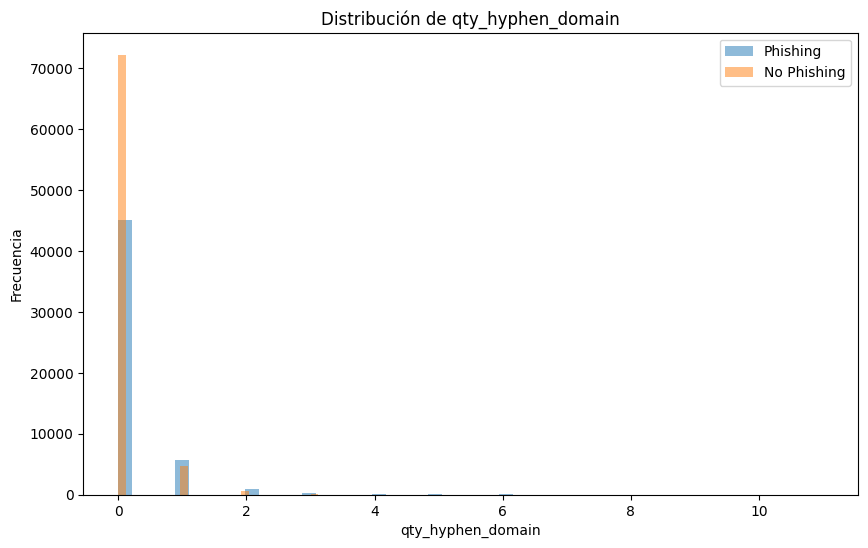

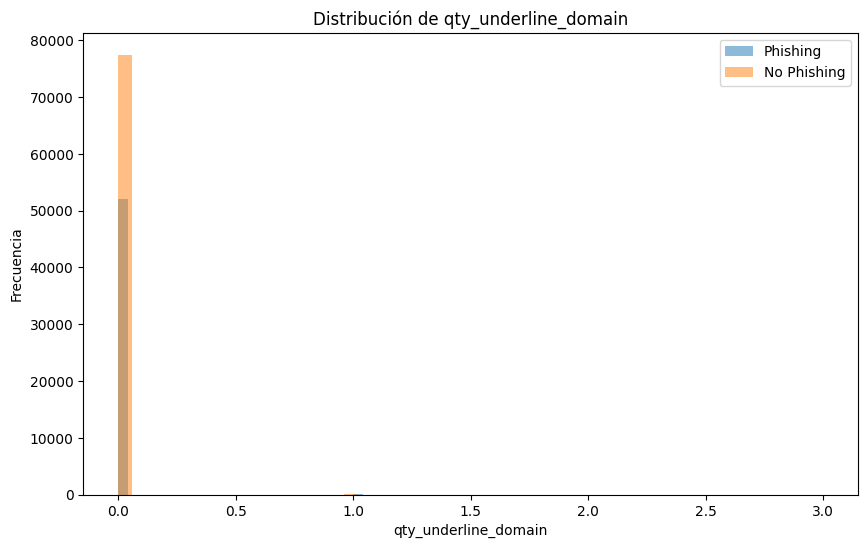

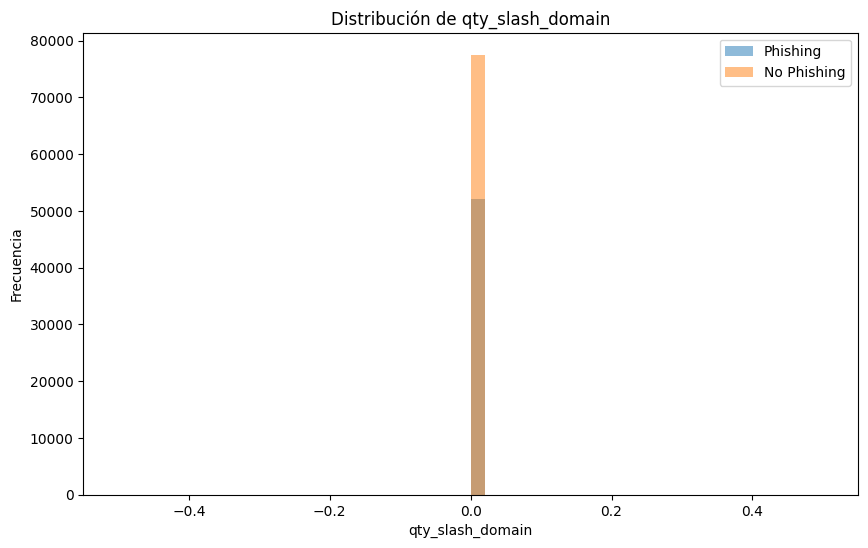

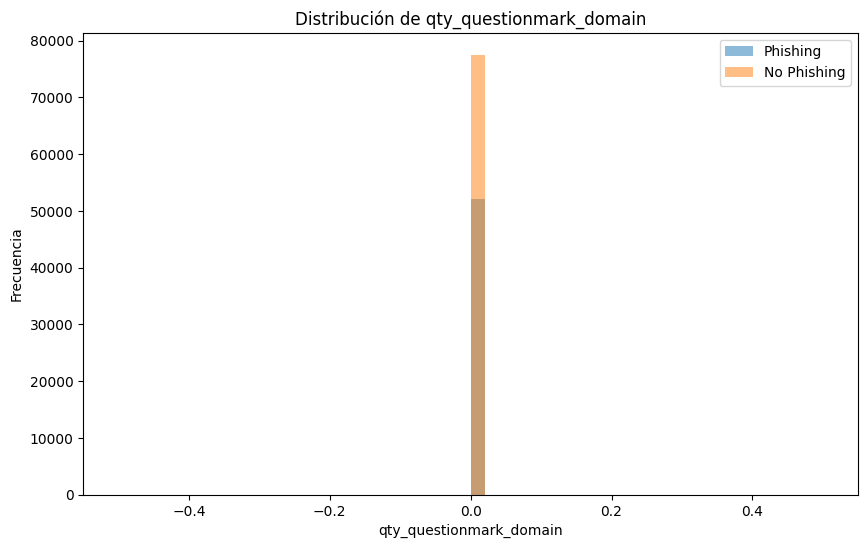

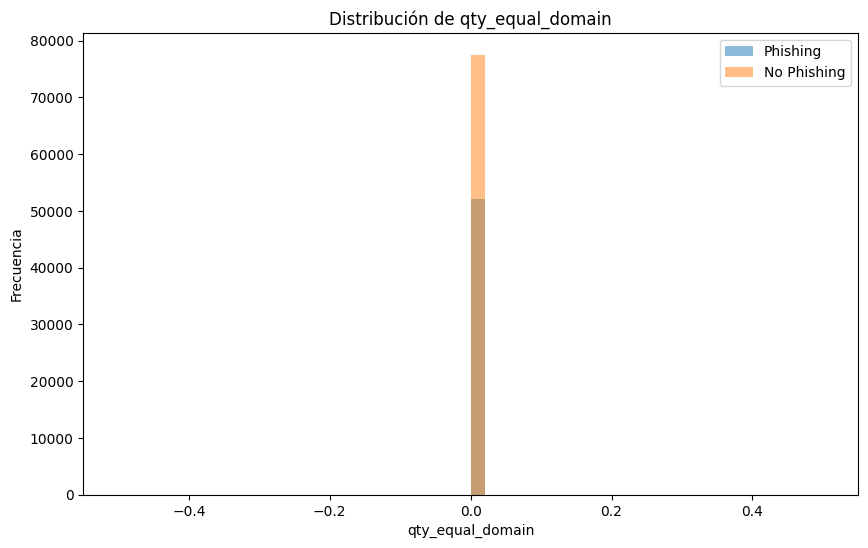

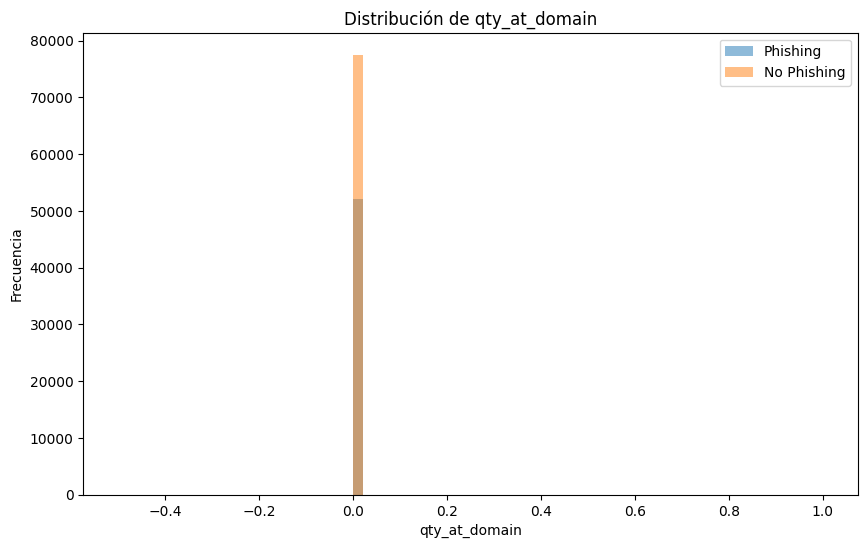

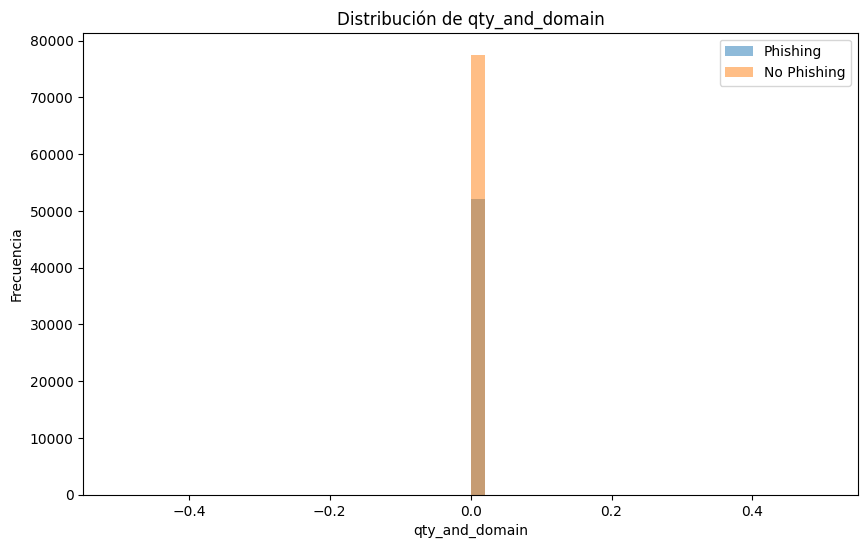

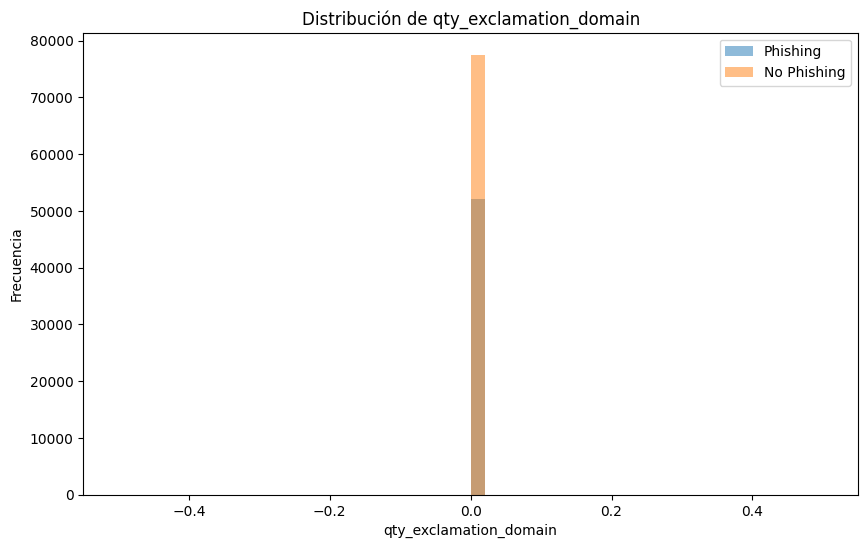

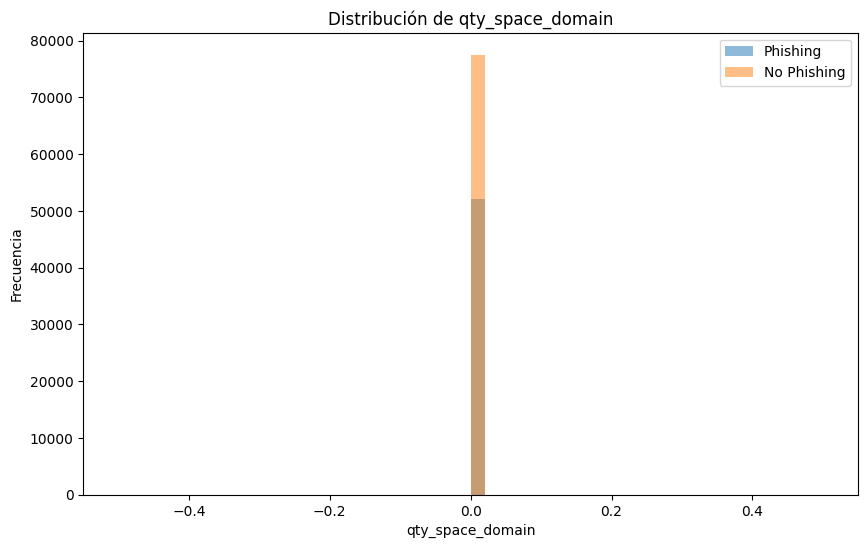

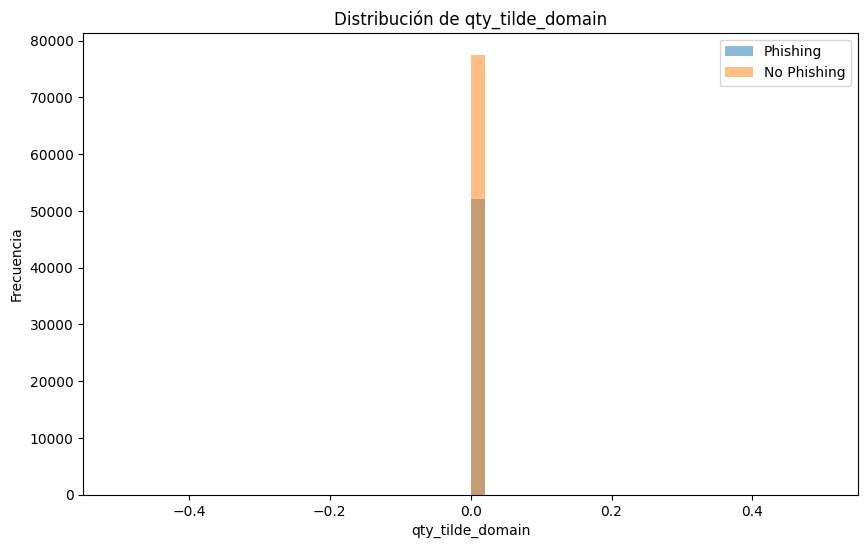

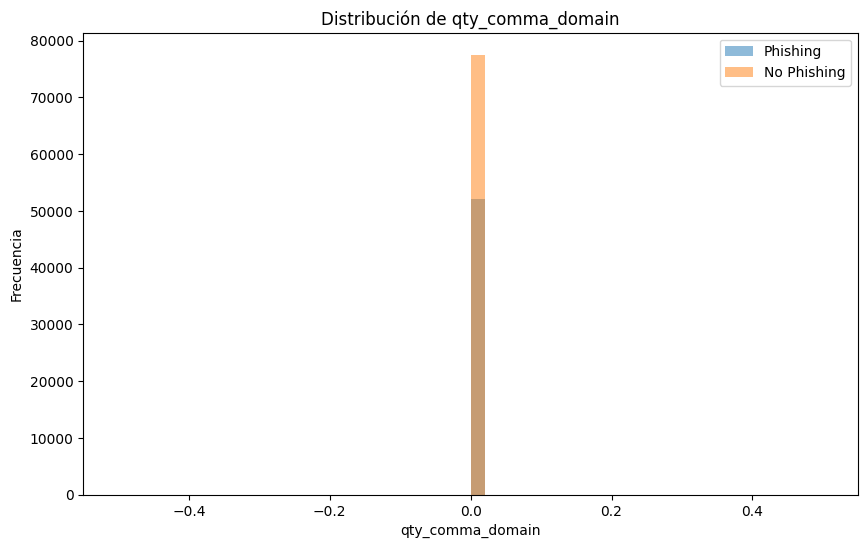

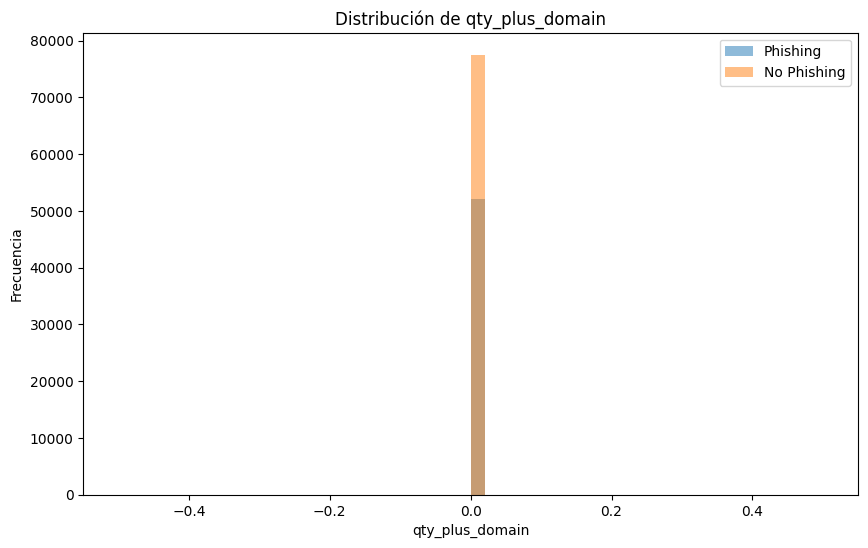

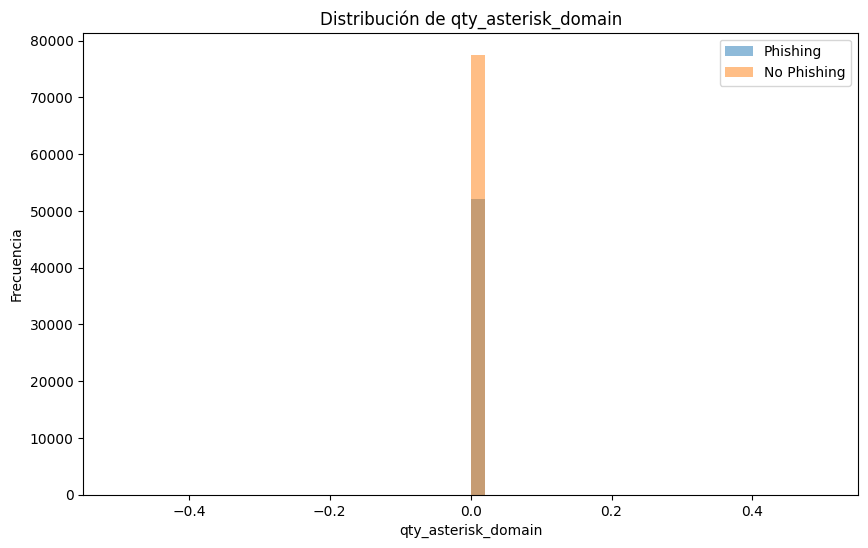

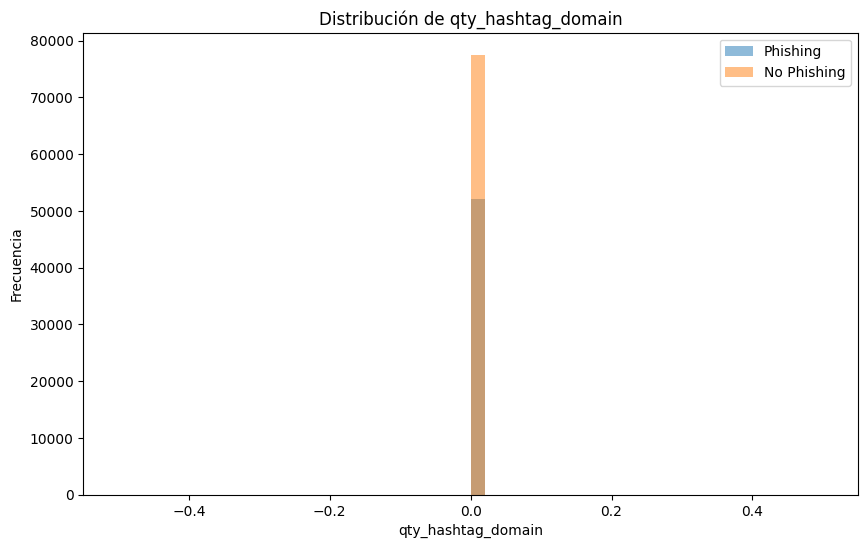

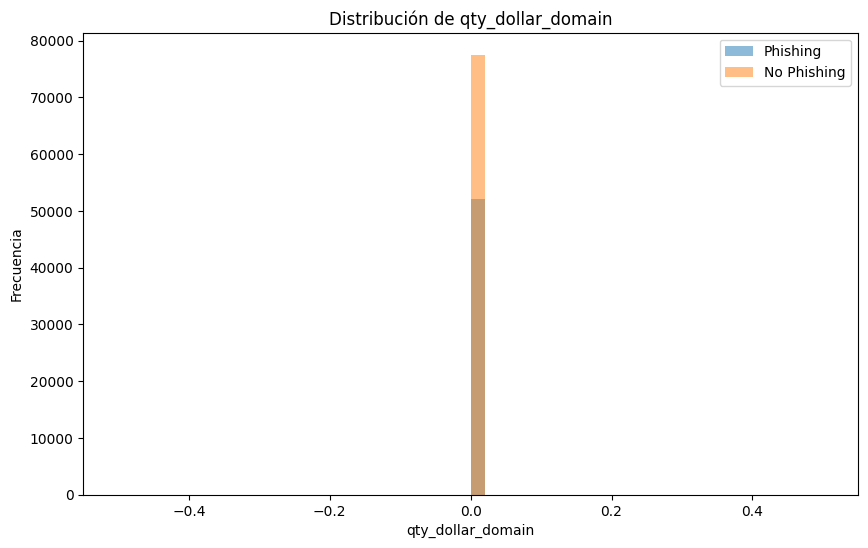

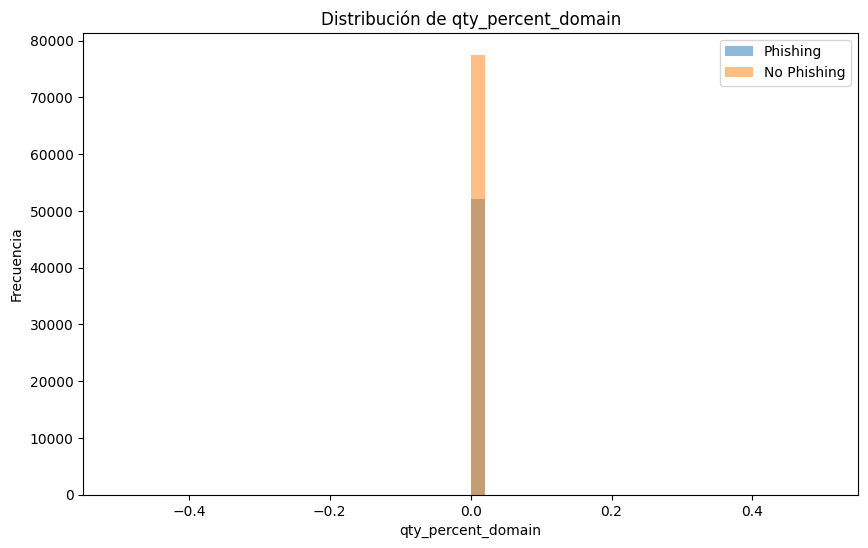

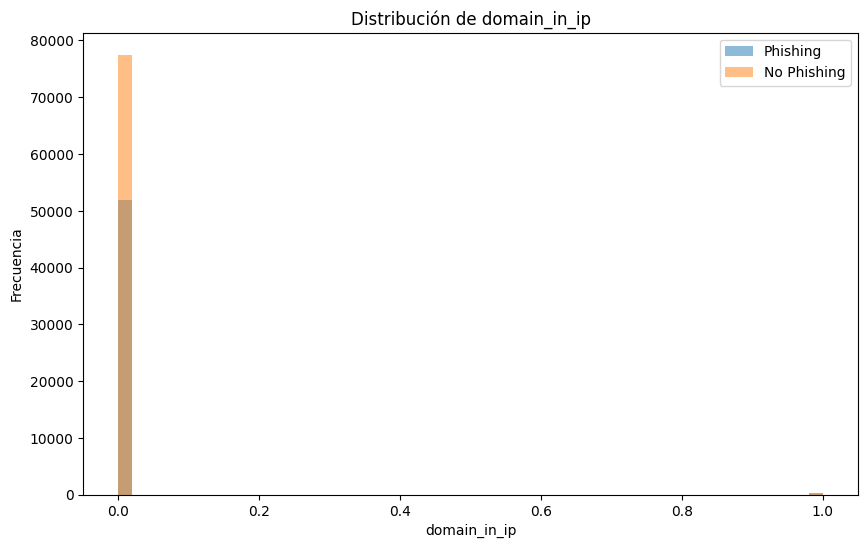

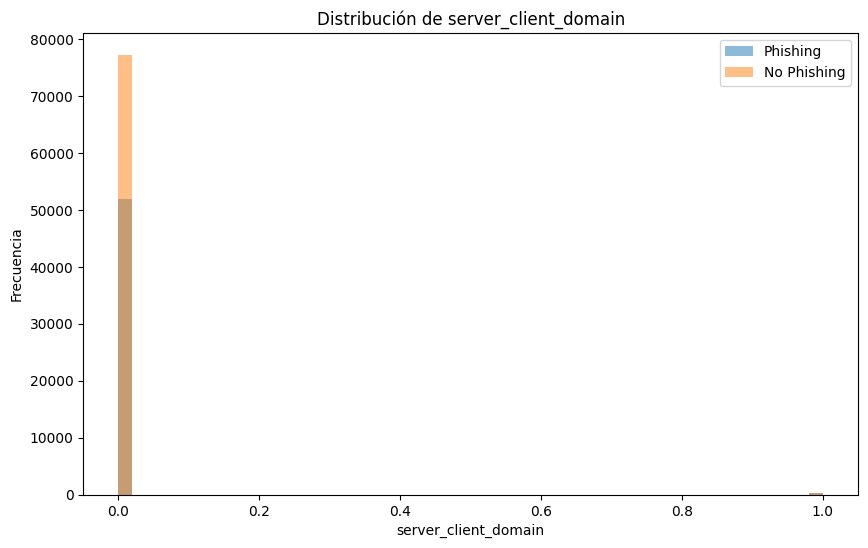

In [19]:
# Crear histogramas para cada característica del dominio
for feature in domain_features:
    plot_histogram(feature)

<Figure size 3000x2000 with 0 Axes>

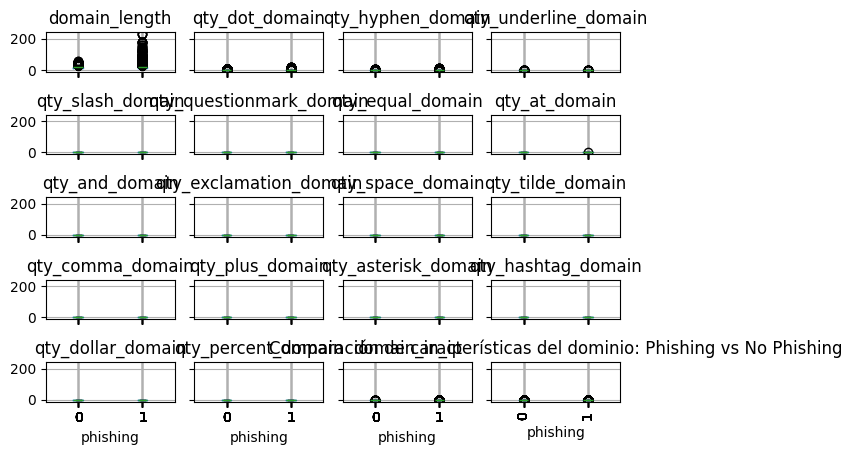

In [20]:
# Crear un boxplot para comparar múltiples características
plt.figure(figsize=(30, 20))
df.boxplot(column=domain_features, by='phishing')
plt.title('Comparación de características del dominio: Phishing vs No Phishing')
plt.suptitle('')  # This removes the automatic suptitle
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [21]:
# Calcular y mostrar estadísticas descriptivas
print("Estadísticas para dominios de Phishing:")
print(phishing[domain_features].describe())
print("\nEstadísticas para dominios No Phishing:")
print(non_phishing[domain_features].describe())

# Matriz de correlación para características del dominio
corr_matrix = df[domain_features + ['phishing']].corr()

Estadísticas para dominios de Phishing:
       domain_length  qty_dot_domain  qty_hyphen_domain  qty_underline_domain  \
count   52152.000000    52152.000000       52152.000000          52152.000000   
mean       18.645728        1.618730           0.182563              0.000575   
std         8.566074        0.828011           0.567082              0.028373   
min         4.000000        0.000000           0.000000              0.000000   
25%        14.000000        1.000000           0.000000              0.000000   
50%        17.000000        2.000000           0.000000              0.000000   
75%        22.000000        2.000000           0.000000              0.000000   
max       231.000000       21.000000          11.000000              2.000000   

       qty_slash_domain  qty_questionmark_domain  qty_equal_domain  \
count           52152.0                  52152.0           52152.0   
mean                0.0                      0.0               0.0   
std                 

Analisis características del archivo

In [22]:
# Características del archivo a examinar
file_features = ['file_length', 'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file',
                 'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file', 'qty_at_file',
                 'qty_and_file', 'qty_exclamation_file', 'qty_space_file', 'qty_tilde_file',
                 'qty_comma_file', 'qty_plus_file', 'qty_asterisk_file', 'qty_hashtag_file',
                 'qty_dollar_file', 'qty_percent_file']

In [23]:
# Función para crear histogramas comparativos
def plot_histogram(feature):
    plt.figure(figsize=(10, 6))
    plt.hist(phishing[feature], bins=50, alpha=0.5, label='Phishing')
    plt.hist(non_phishing[feature], bins=50, alpha=0.5, label='No Phishing')
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

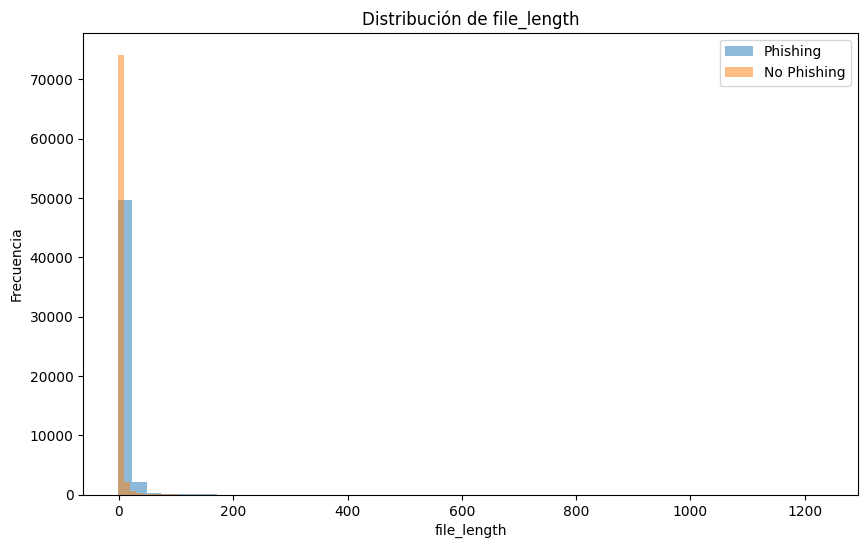

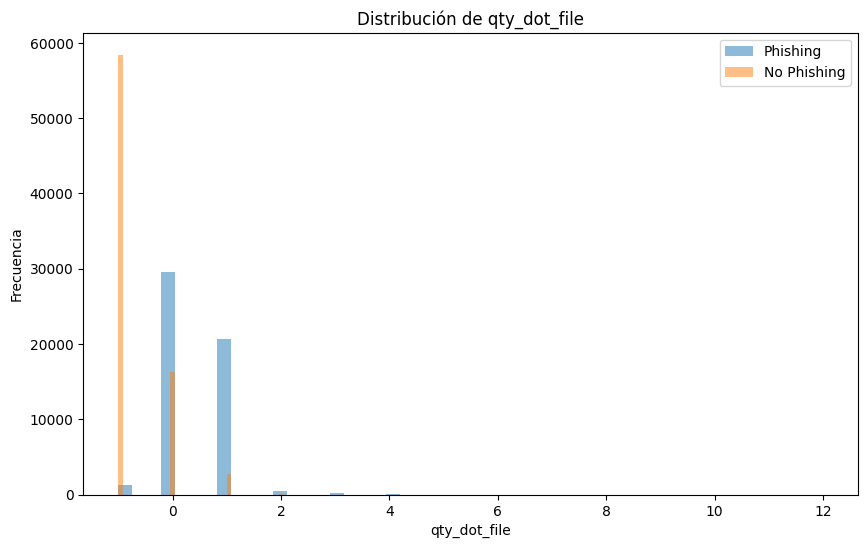

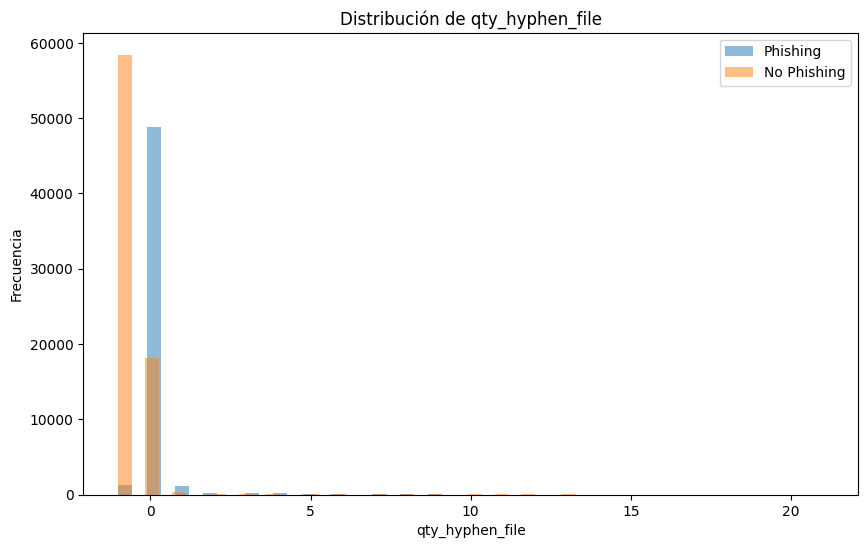

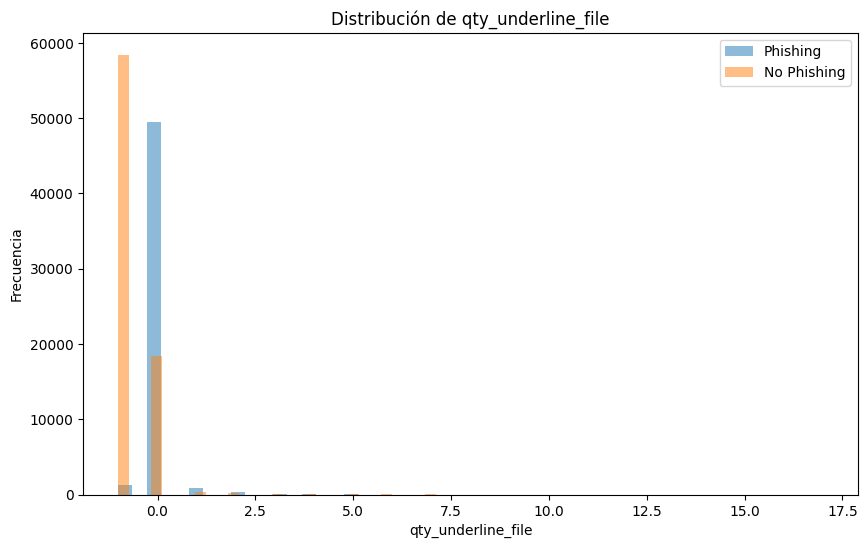

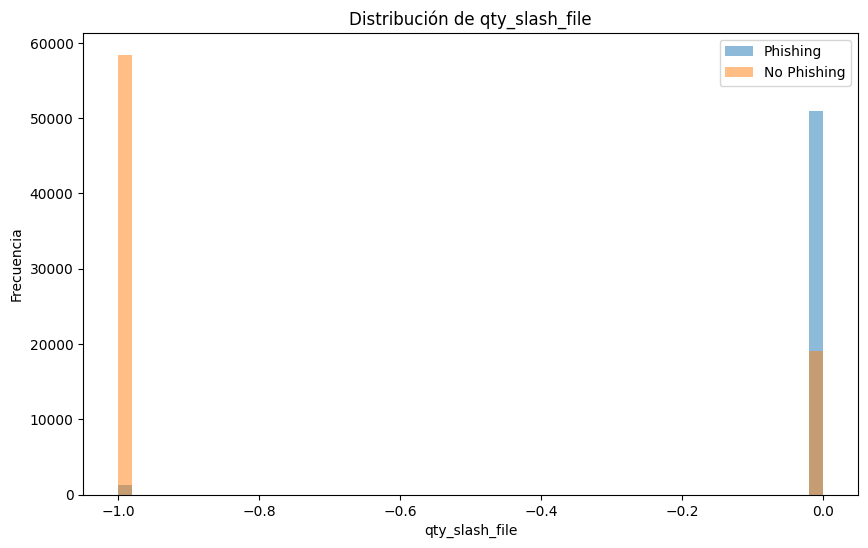

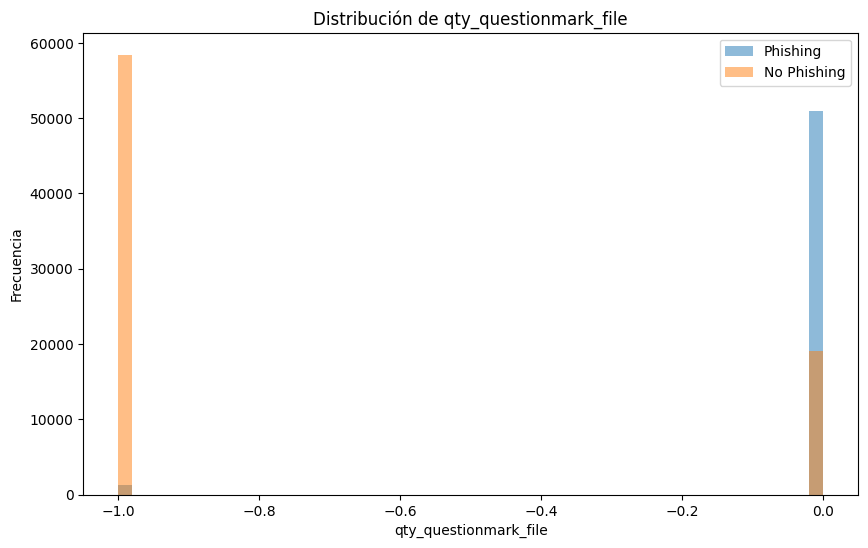

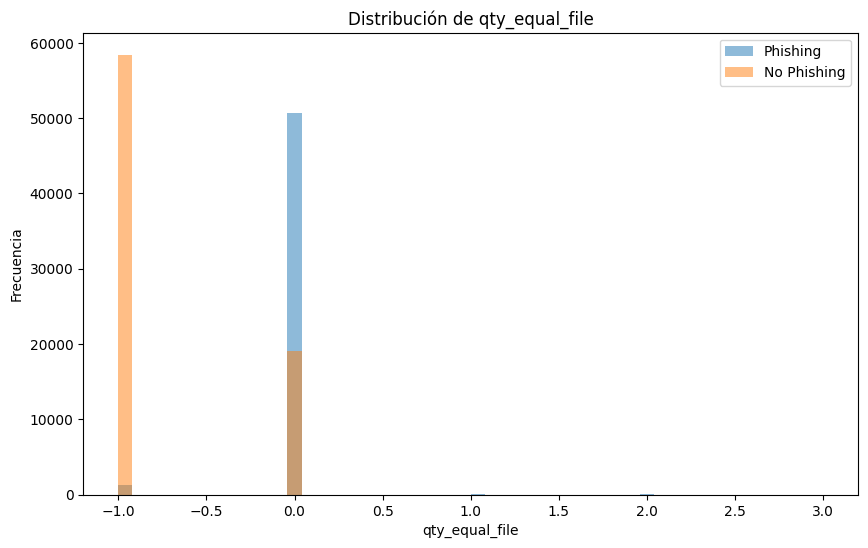

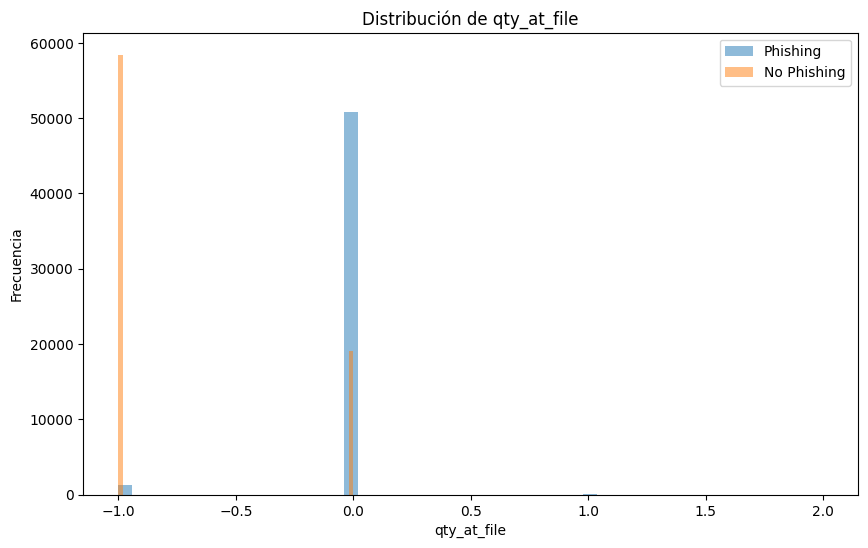

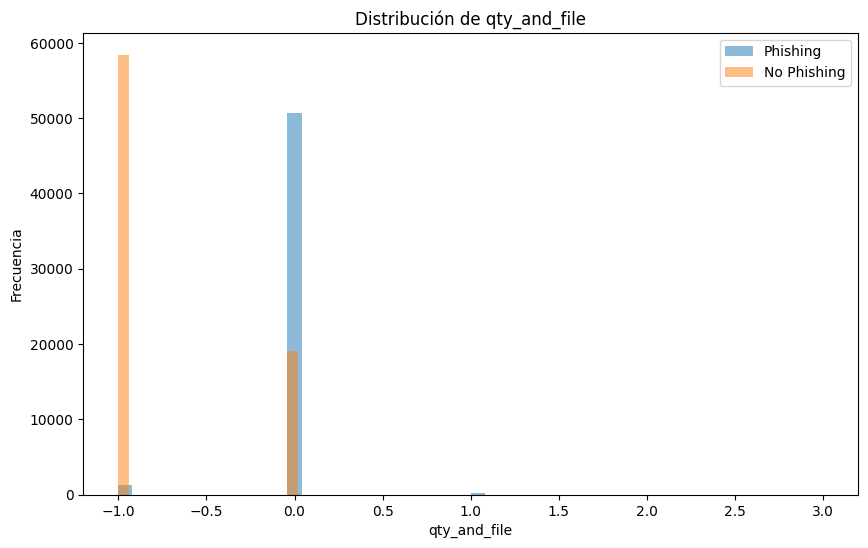

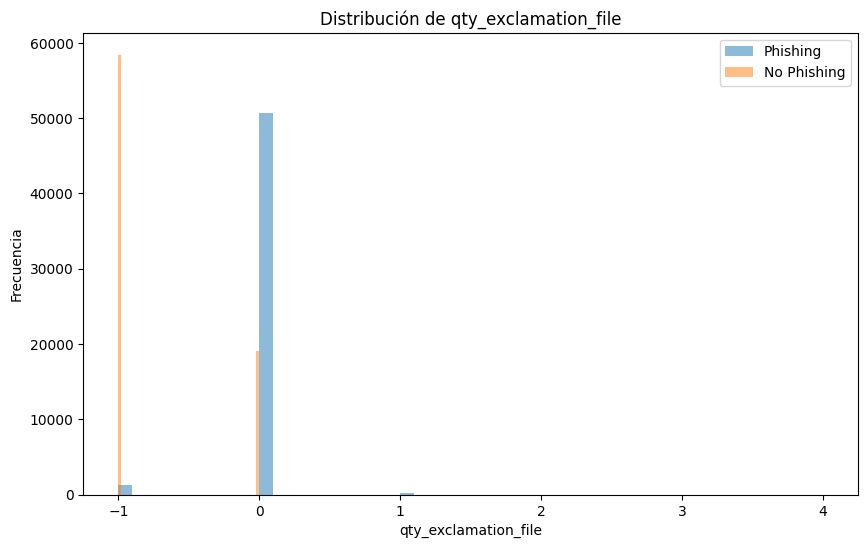

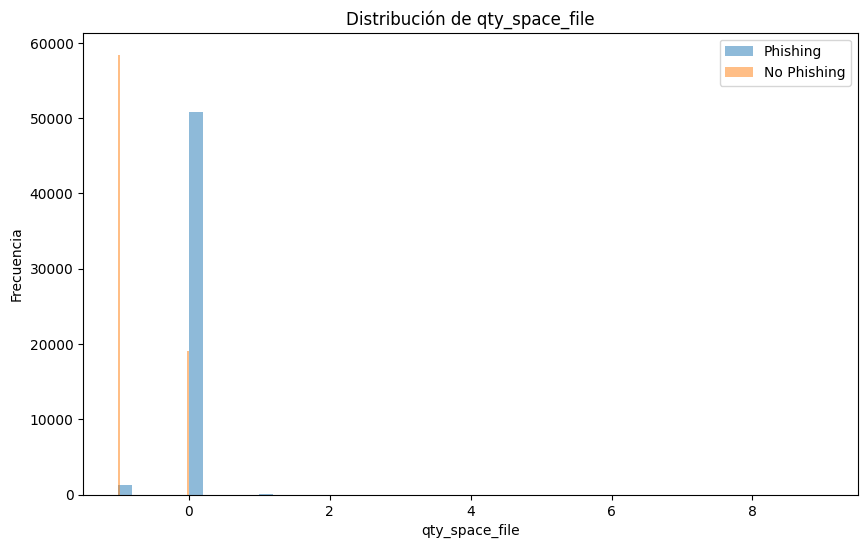

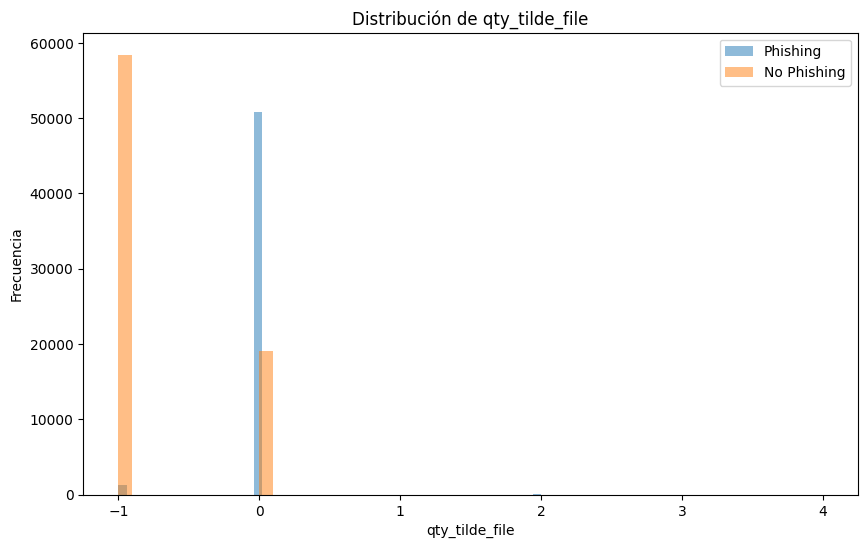

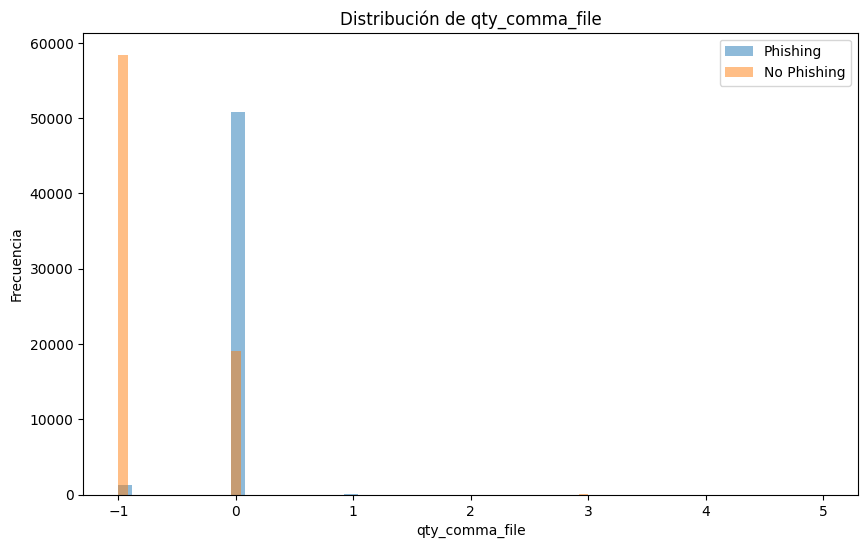

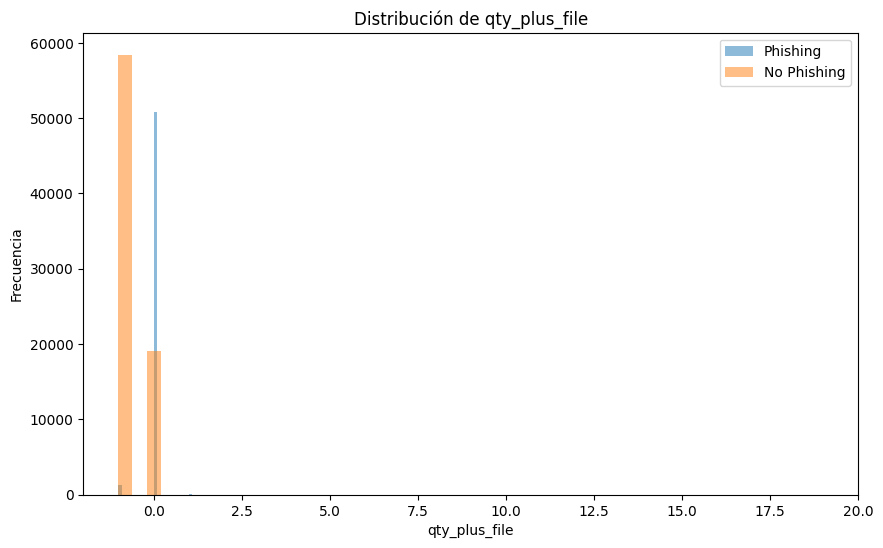

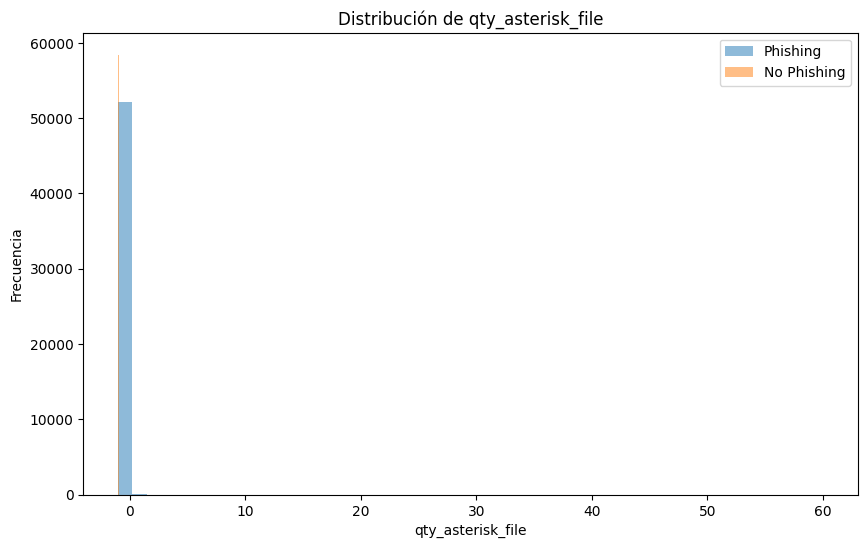

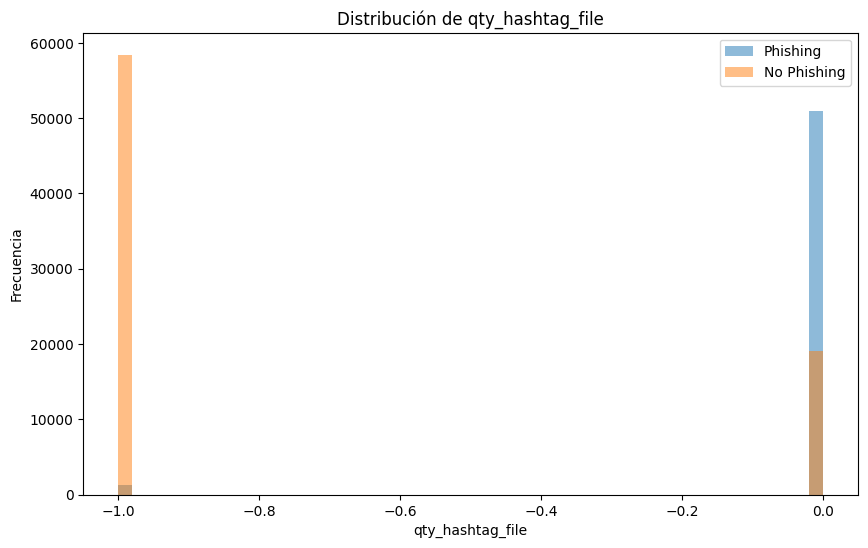

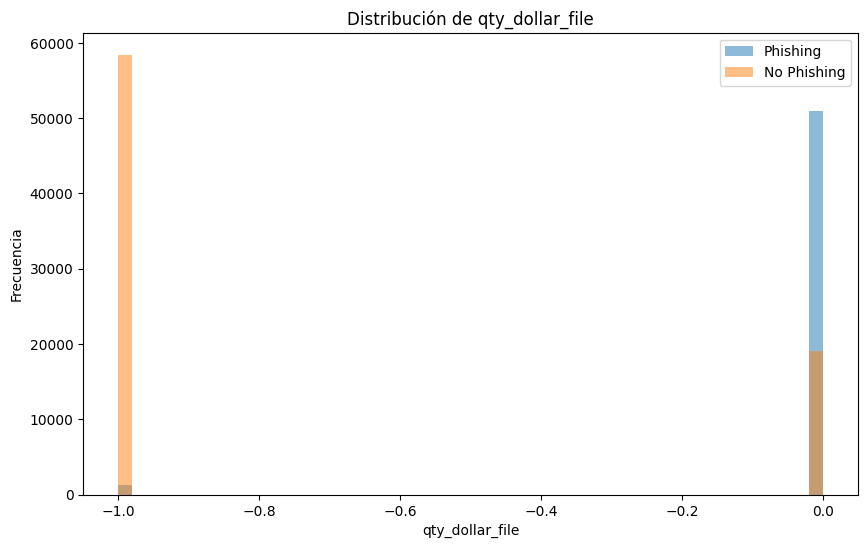

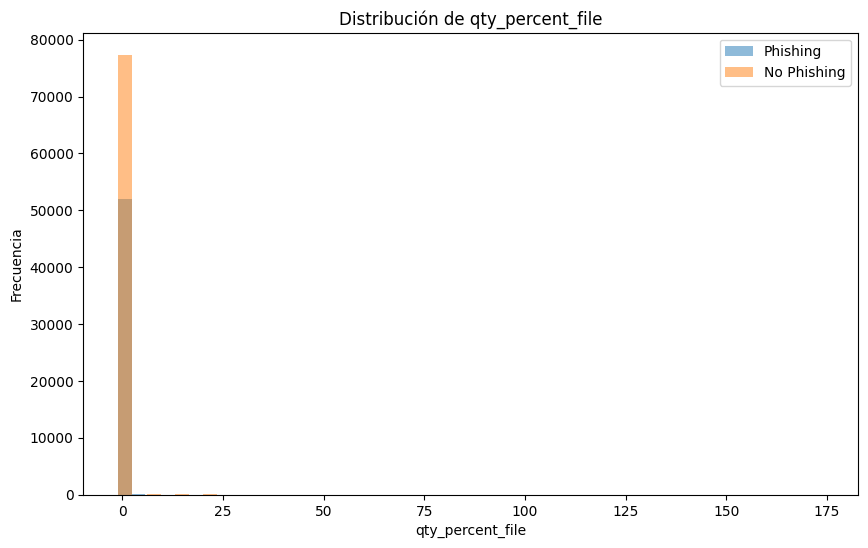

In [24]:
# Crear histogramas para cada característica del archivo
for feature in file_features:
    plot_histogram(feature)

<Figure size 2000x1000 with 0 Axes>

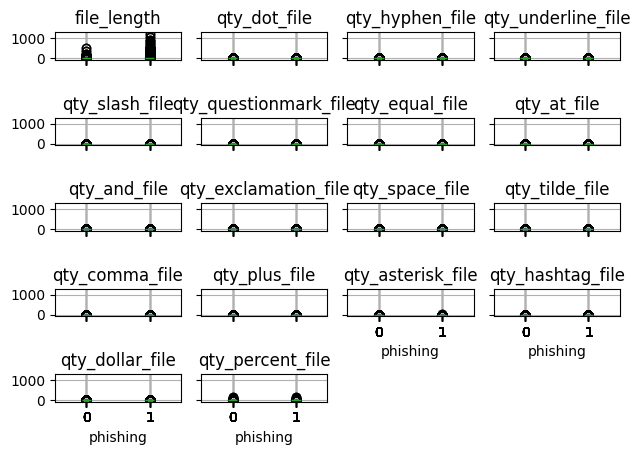

In [25]:
# Crear un boxplot para comparar múltiples características
plt.figure(figsize=(20, 10))
df.boxplot(column=file_features, by='phishing')
plt.title('Comparación de características del archivo: Phishing vs No Phishing')
plt.suptitle('')  # This removes the automatic suptitle
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [26]:
# Calcular y mostrar estadísticas descriptivas
print("Estadísticas para archivos en URLs de Phishing:")
print(phishing[file_features].describe())
print("\nEstadísticas para archivos en URLs No Phishing:")
print(non_phishing[file_features].describe())

Estadísticas para archivos en URLs de Phishing:
        file_length  qty_dot_file  qty_hyphen_file  qty_underline_file  \
count  52152.000000  52152.000000     52152.000000        52152.000000   
mean       7.552002      0.405239         0.065961            0.019386   
std       21.113531      0.591395         0.666219            0.434098   
min       -1.000000     -1.000000        -1.000000           -1.000000   
25%        0.000000      0.000000         0.000000            0.000000   
50%        6.000000      0.000000         0.000000            0.000000   
75%       10.000000      1.000000         0.000000            0.000000   
max     1232.000000     12.000000        21.000000           17.000000   

       qty_slash_file  qty_questionmark_file  qty_equal_file   qty_at_file  \
count    52152.000000           52152.000000    52152.000000  52152.000000   
mean        -0.024256              -0.024256       -0.019558     -0.023336   
std          0.153844               0.153844       

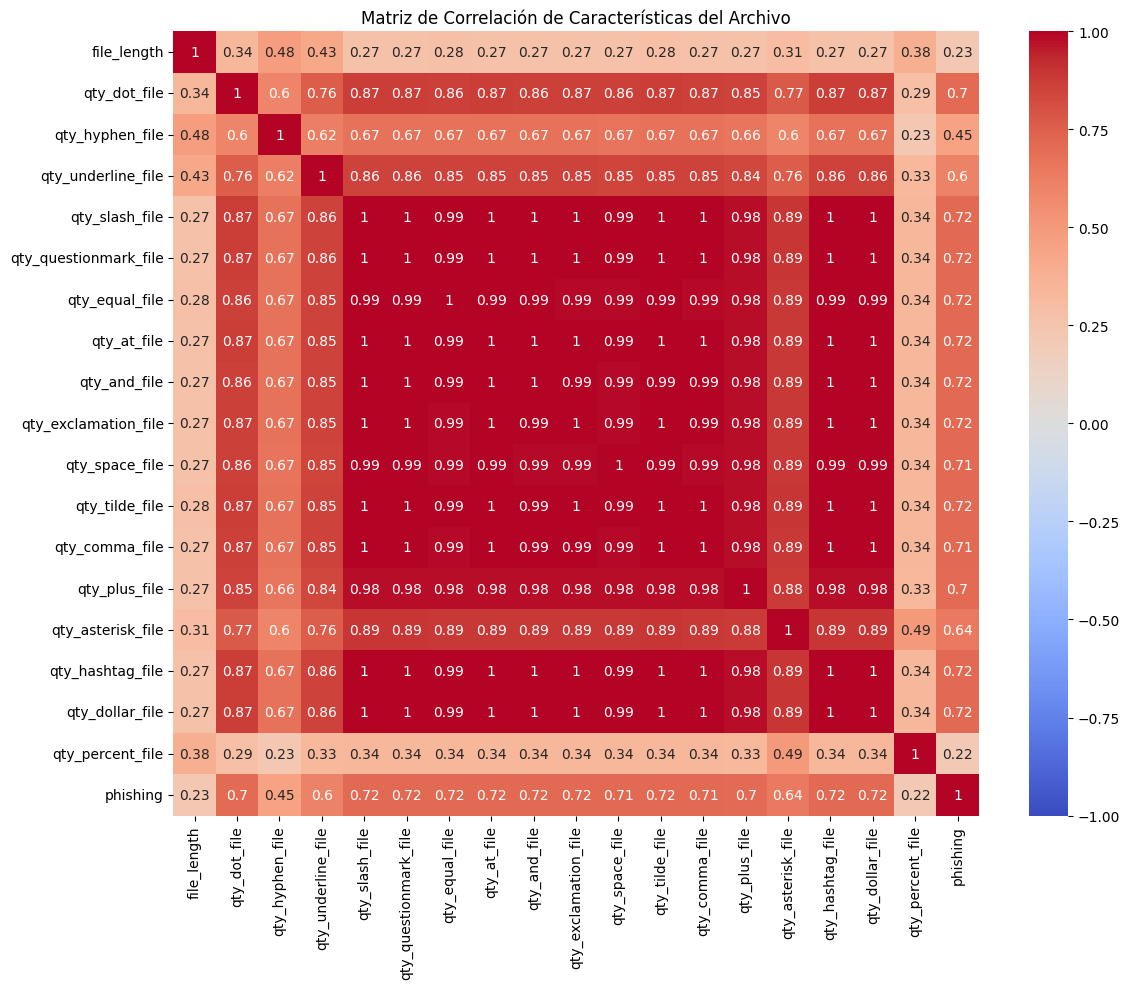

In [27]:
# Matriz de correlación para características del archivo
corr_matrix = df[file_features + ['phishing']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación de Características del Archivo')
plt.tight_layout()
plt.show()

Observaciones:

1. Longitud del archivo(file_length):

- Estadísticas: Phishing: media 7.55, máx 1232 No Phishing: media 0.55, máx 524
- Histograma: Confirmó que los archivos en URLs de phishing tienden a ser más largos.
- Análisis: Las URLs de phishing utilizan nombres de archivo significativamente más largos, posiblemente para parecer más complejas o legítimas.

2. Puntos en el archivo (qty_dot_file):

- Estadísticas: Phishing: media 0.41, máx 12 No Phishing: media -0.72, máx 3
- Histograma: Mayor frecuencia y variedad de uso de puntos en phishing.
- Análisis: Las URLs de phishing tienden a usar más puntos en los nombres de archivo, posiblemente para imitar estructuras de URL complejas o legítimas.

3. Guiones en el archivo (qty_hyphen_file):

- Estadísticas: Phishing: media 0.07, máx 21 No Phishing: media -0.70, máx 20
- Histograma: Mayor uso de guiones en phishing, con frecuencia aumentando desde 0.
- Análisis: Similar a los puntos, los guiones se usan más en URLs de phishing, probablemente para crear nombres de archivo más complejos.

4. Caracteres especiales (underline, slash, question mark, equal, at, and, exclamation, space, tilde, comma, plus, asterisk, hashtag):

- Estadísticas: La mayoría muestra medias negativas para No Phishing (cerca de -0.75) y medias cercanas a 0 para Phishing.
- Histogramas: Consistentemente mostraron alta frecuencia de -1 para No Phishing y alta frecuencia de 0 para Phishing.
- Análisis:

    - Las URLs no phishing generalmente no tienen parte de archivo o no usan estos caracteres especiales.
    - Las URLs de phishing tienden a tener archivos, pero no siempre usan estos caracteres especiales.
    - Cuando se usan caracteres especiales, es más probable que sea en URLs de phishing.

Conclusiones y recomendaciones:

1. Presencia de archivo: Crear una característica binaria que indique si hay un archivo presente (file_length > 0).
2. Complejidad del nombre de archivo: Desarrollar una medida de complejidad basada en la longitud y el uso de caracteres especiales.
3. Uso de caracteres especiales: Enfocarse en los caracteres que son más comunes en URLs de phishing pero raros en URLs legítimas.
4. Manejo de valores negativos: Los valores -1 parecen indicar ausencia de archivo o característica. Considerar cómo manejar estos valores en el modelo (reemplazar por 0 o tratar como categoría separada).
5. Detección de anomalías: Implementar técnicas para identificar valores extremos, ya que podrían ser indicativos de técnicas de phishing más sofisticadas.
6. Selección de características: Algunas características (como qty_hashtag_file) muestran poca variación y podrían ser eliminadas para simplificar el modelo.
7. Análisis de patrones: Investigar más a fondo los patrones de uso de puntos y guiones en los nombres de archivo de URLs de phishing.
8. Normalización: Considerar la normalización de características como file_length para manejar la gran diferencia en los rangos de valores.

Analisis exploratorio de las variables con caractéristicas de parametros y otros características 


In [28]:
# Características de los parámetros y otras a examinar
param_features = ['params_length', 'tld_present_params', 'qty_params',
                  'qty_dot_params', 'qty_hyphen_params', 'qty_underline_params',
                  'qty_slash_params', 'qty_questionmark_params', 'qty_equal_params',
                  'qty_at_params', 'qty_and_params', 'qty_exclamation_params',
                  'qty_space_params', 'qty_tilde_params', 'qty_comma_params',
                  'qty_plus_params', 'qty_asterisk_params', 'qty_hashtag_params',
                  'qty_dollar_params', 'qty_percent_params']

In [29]:
# Función para crear histogramas comparativos
def plot_histogram(feature):
    plt.figure(figsize=(10, 6))
    plt.hist(phishing[feature], bins=50, alpha=0.5, label='Phishing')
    plt.hist(non_phishing[feature], bins=50, alpha=0.5, label='No Phishing')
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

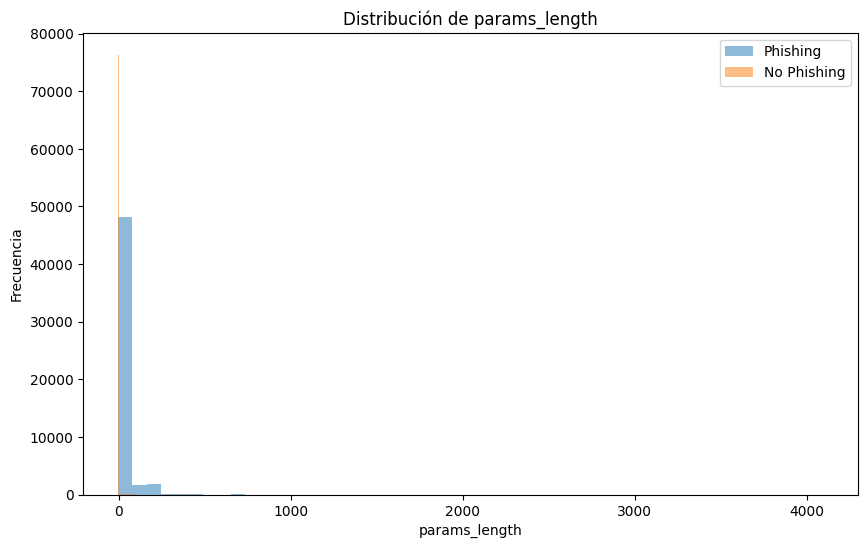

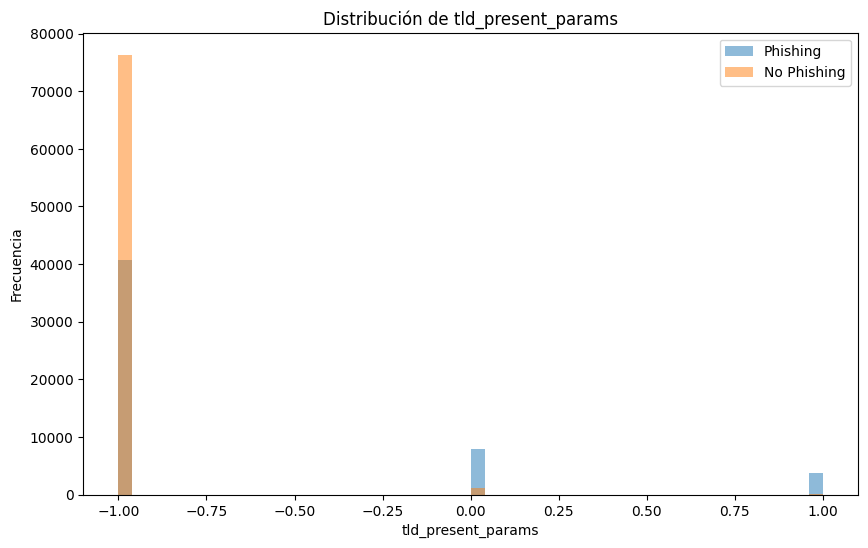

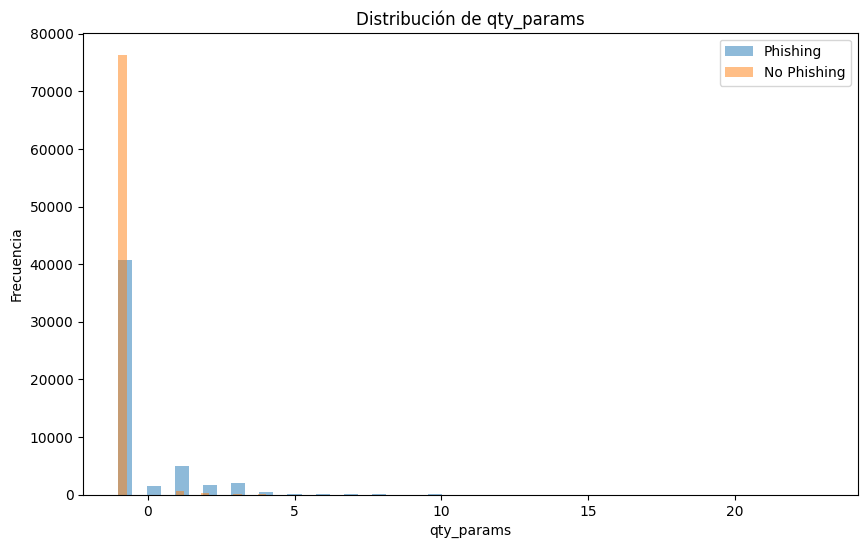

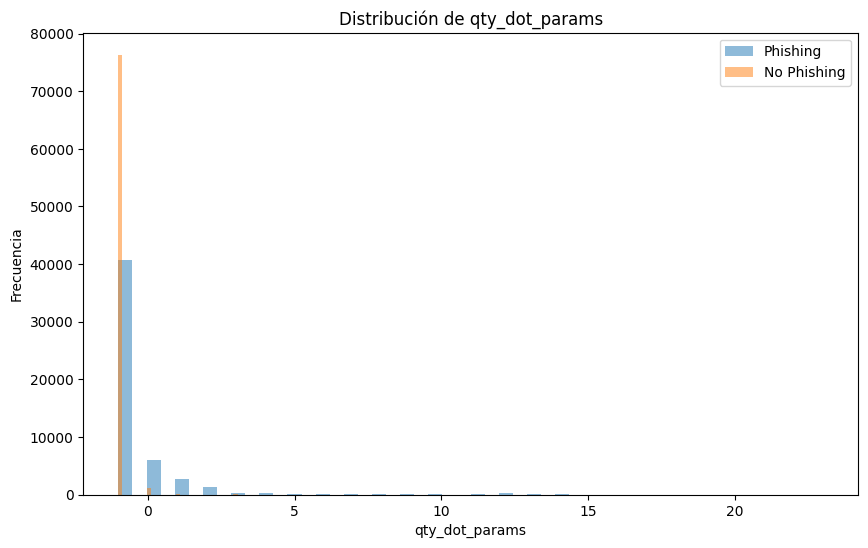

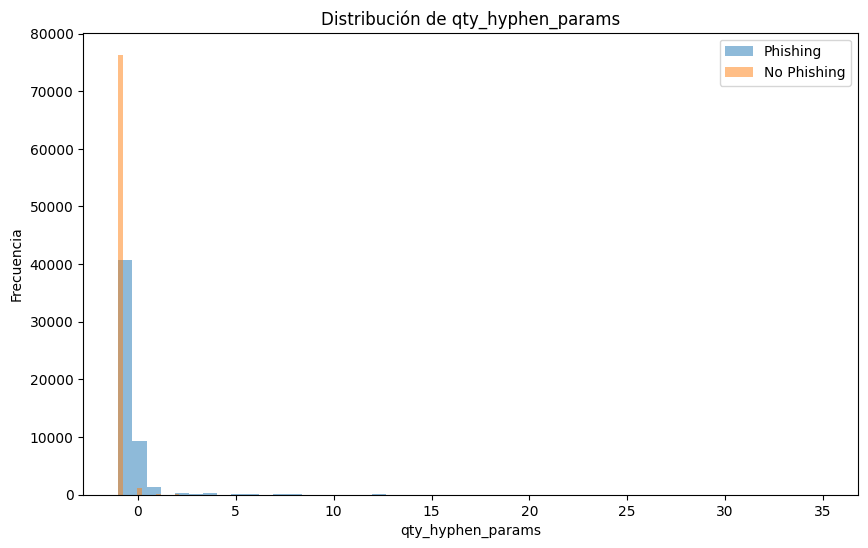

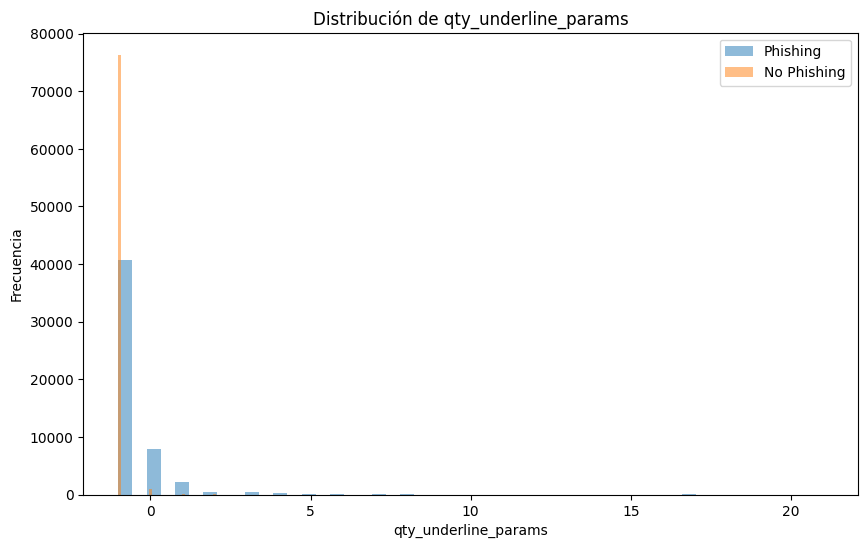

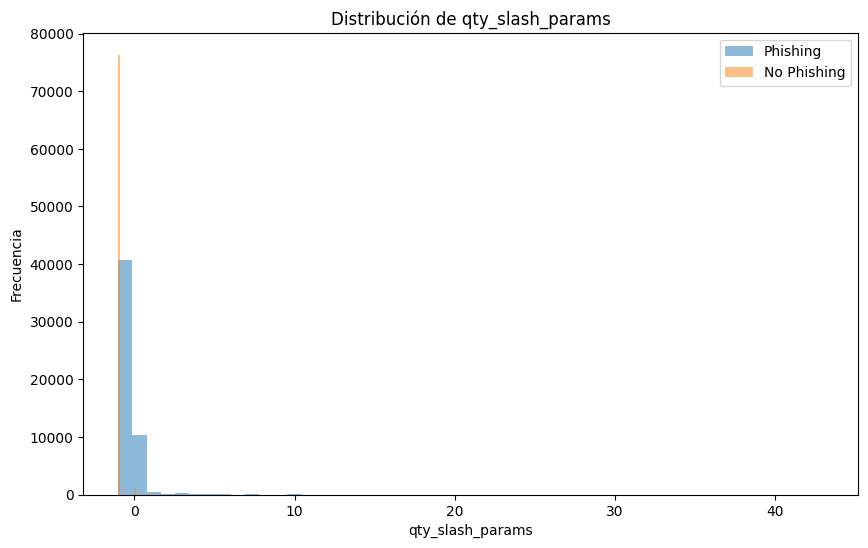

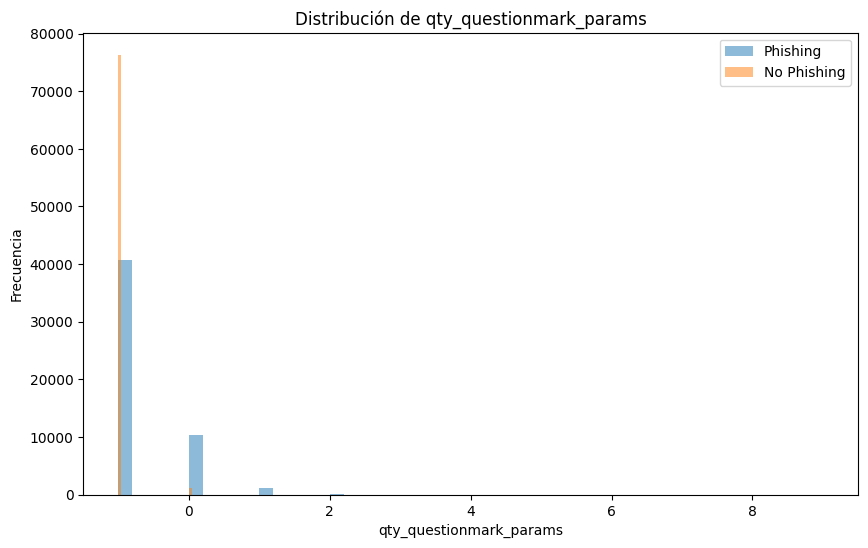

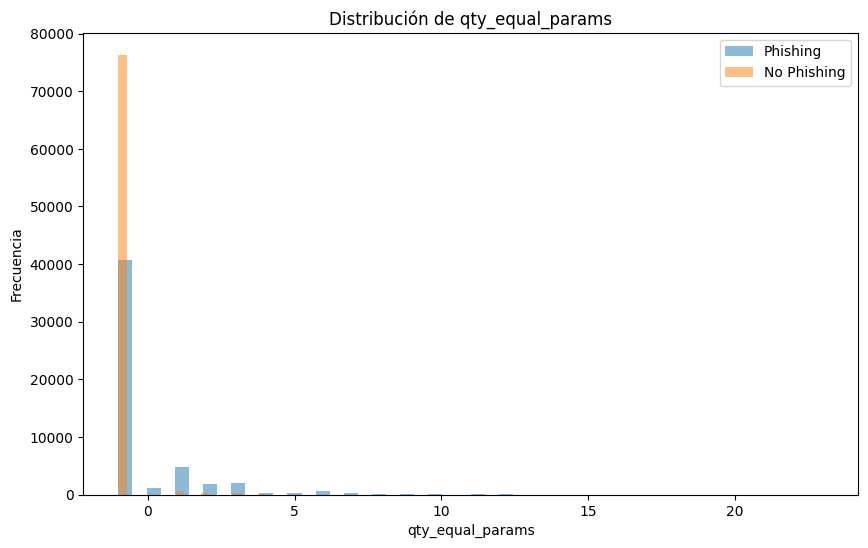

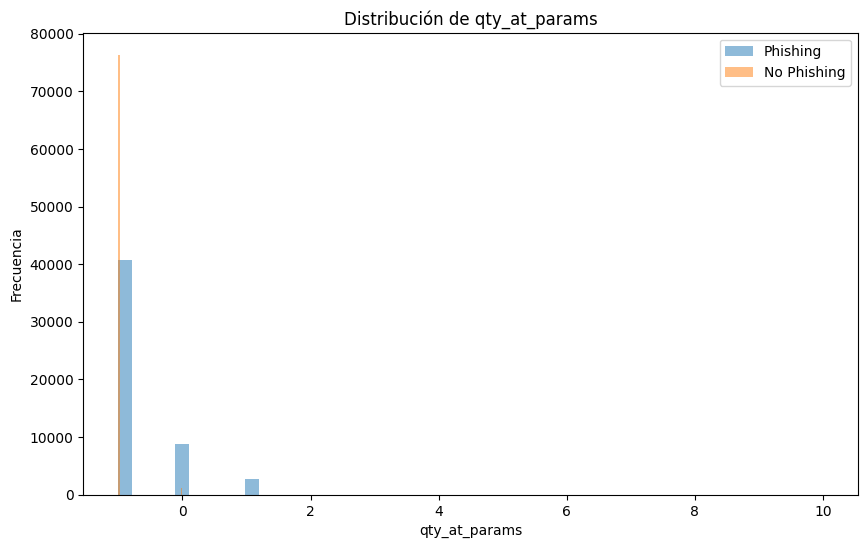

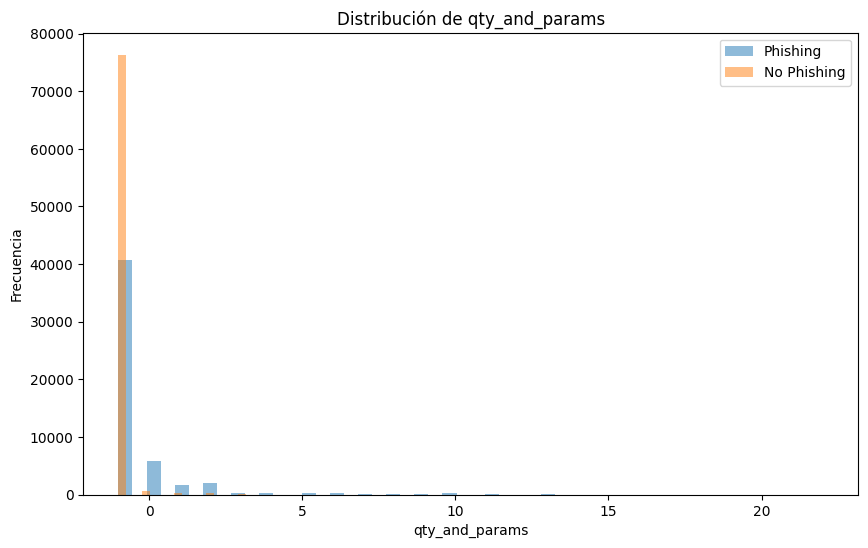

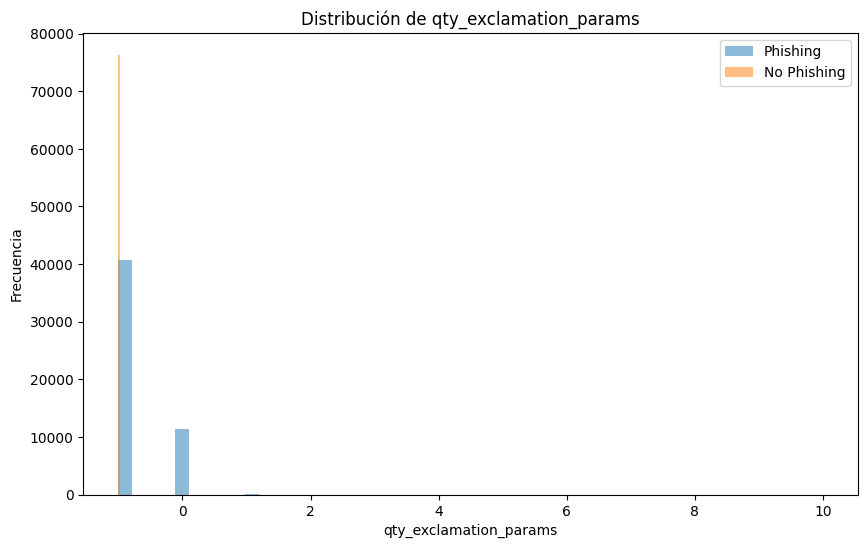

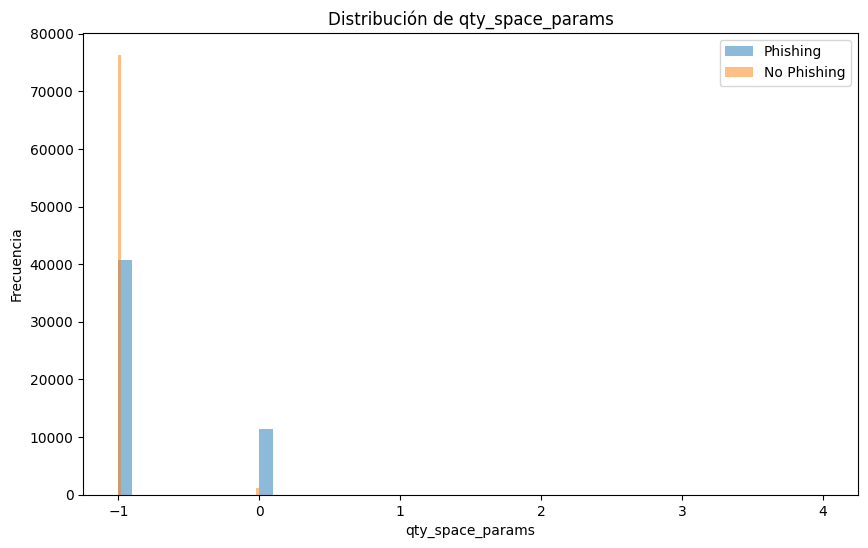

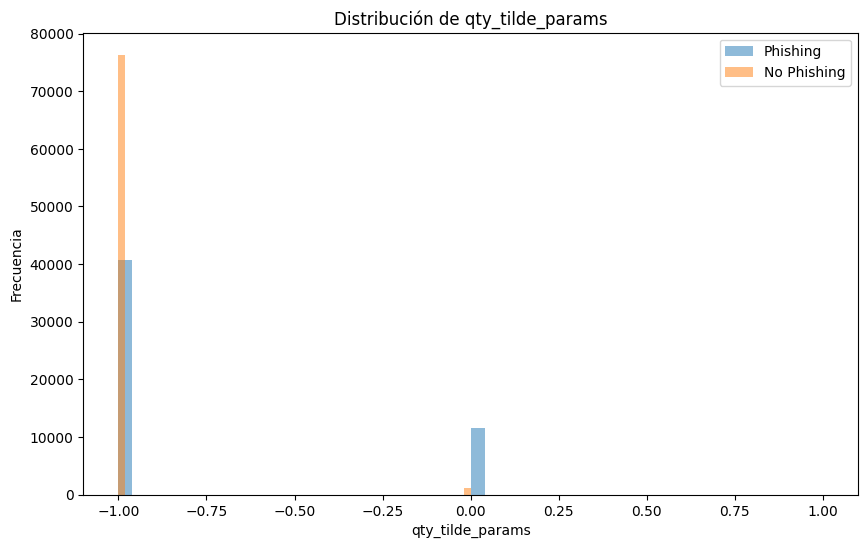

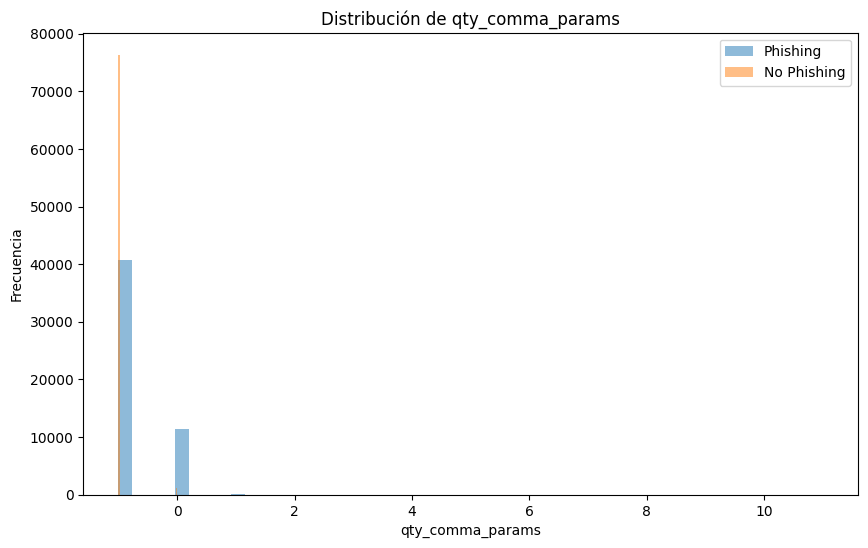

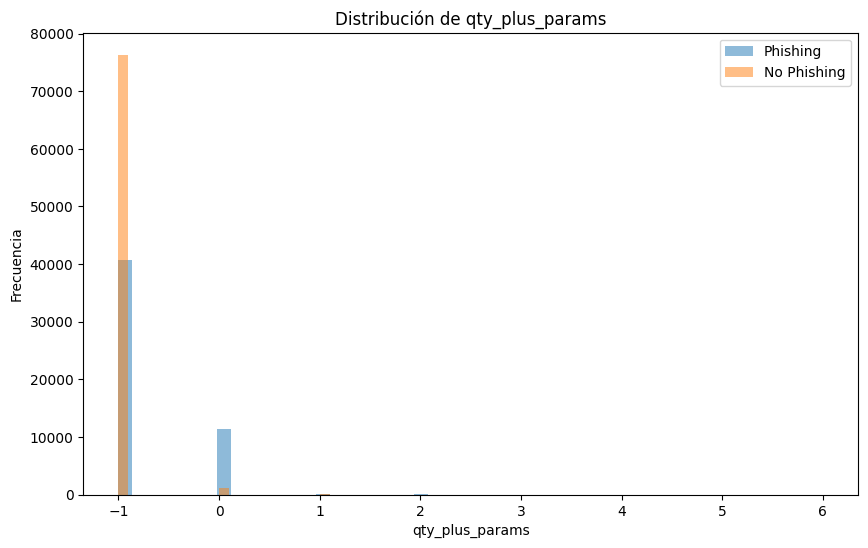

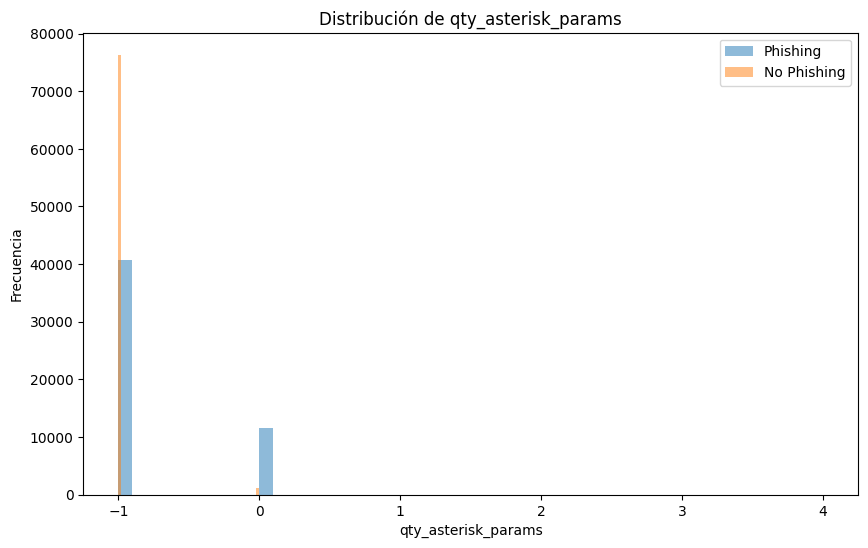

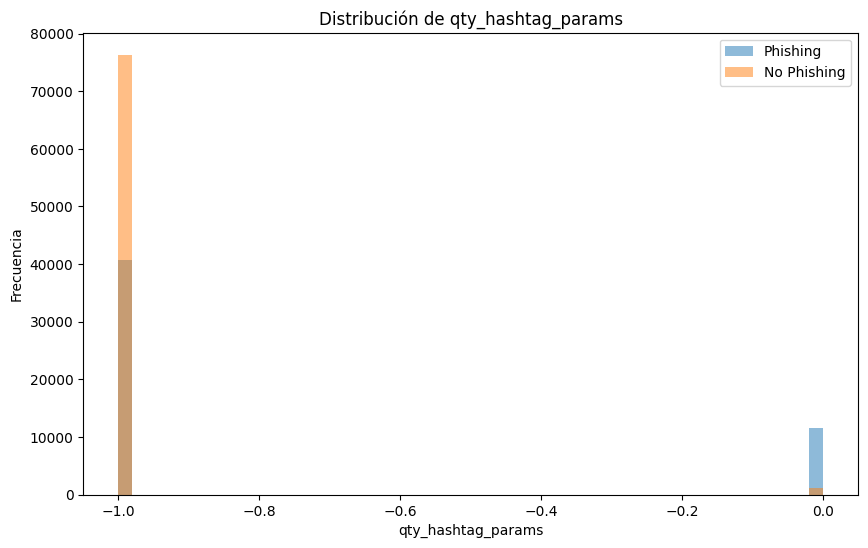

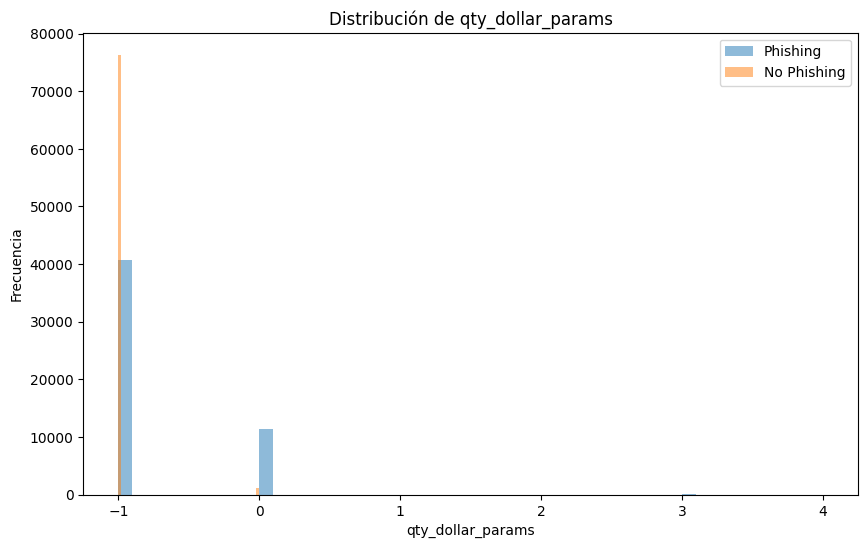

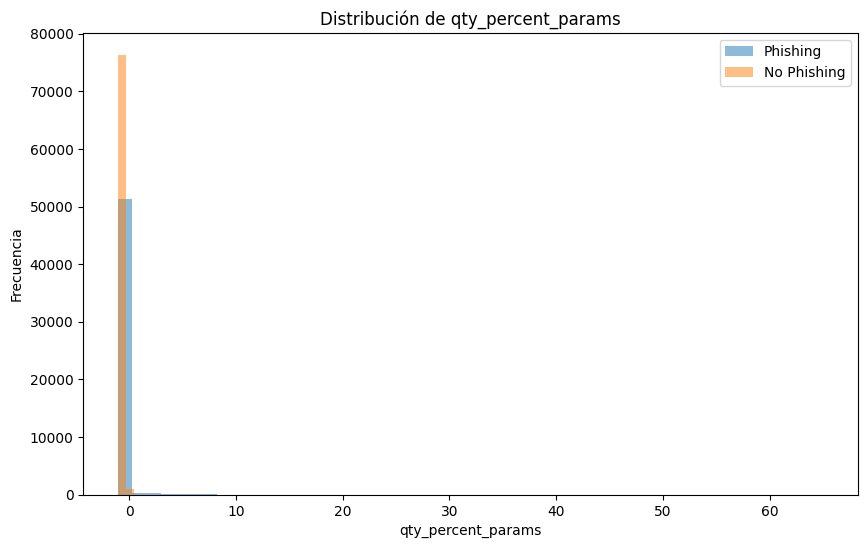

In [30]:
# Crear histogramas para cada característica de los parámetros
for feature in param_features:
    plot_histogram(feature)


Estadísticas para parámetros en URLs de Phishing:
       params_length  tld_present_params    qty_params  qty_dot_params  \
count   52152.000000        52152.000000  52152.000000    52152.000000   
mean       16.450855           -0.709656     -0.366295       -0.482168   
std        58.453728            0.588533      1.454398        1.587855   
min        -1.000000           -1.000000     -1.000000       -1.000000   
25%        -1.000000           -1.000000     -1.000000       -1.000000   
50%        -1.000000           -1.000000     -1.000000       -1.000000   
75%        -1.000000           -1.000000     -1.000000       -1.000000   
max      4094.000000            1.000000     23.000000       23.000000   

       qty_hyphen_params  qty_underline_params  qty_slash_params  \
count       52152.000000          52152.000000      52152.000000   
mean           -0.673071             -0.627128         -0.700031   
std             1.035096              1.060545          0.884733   
min        

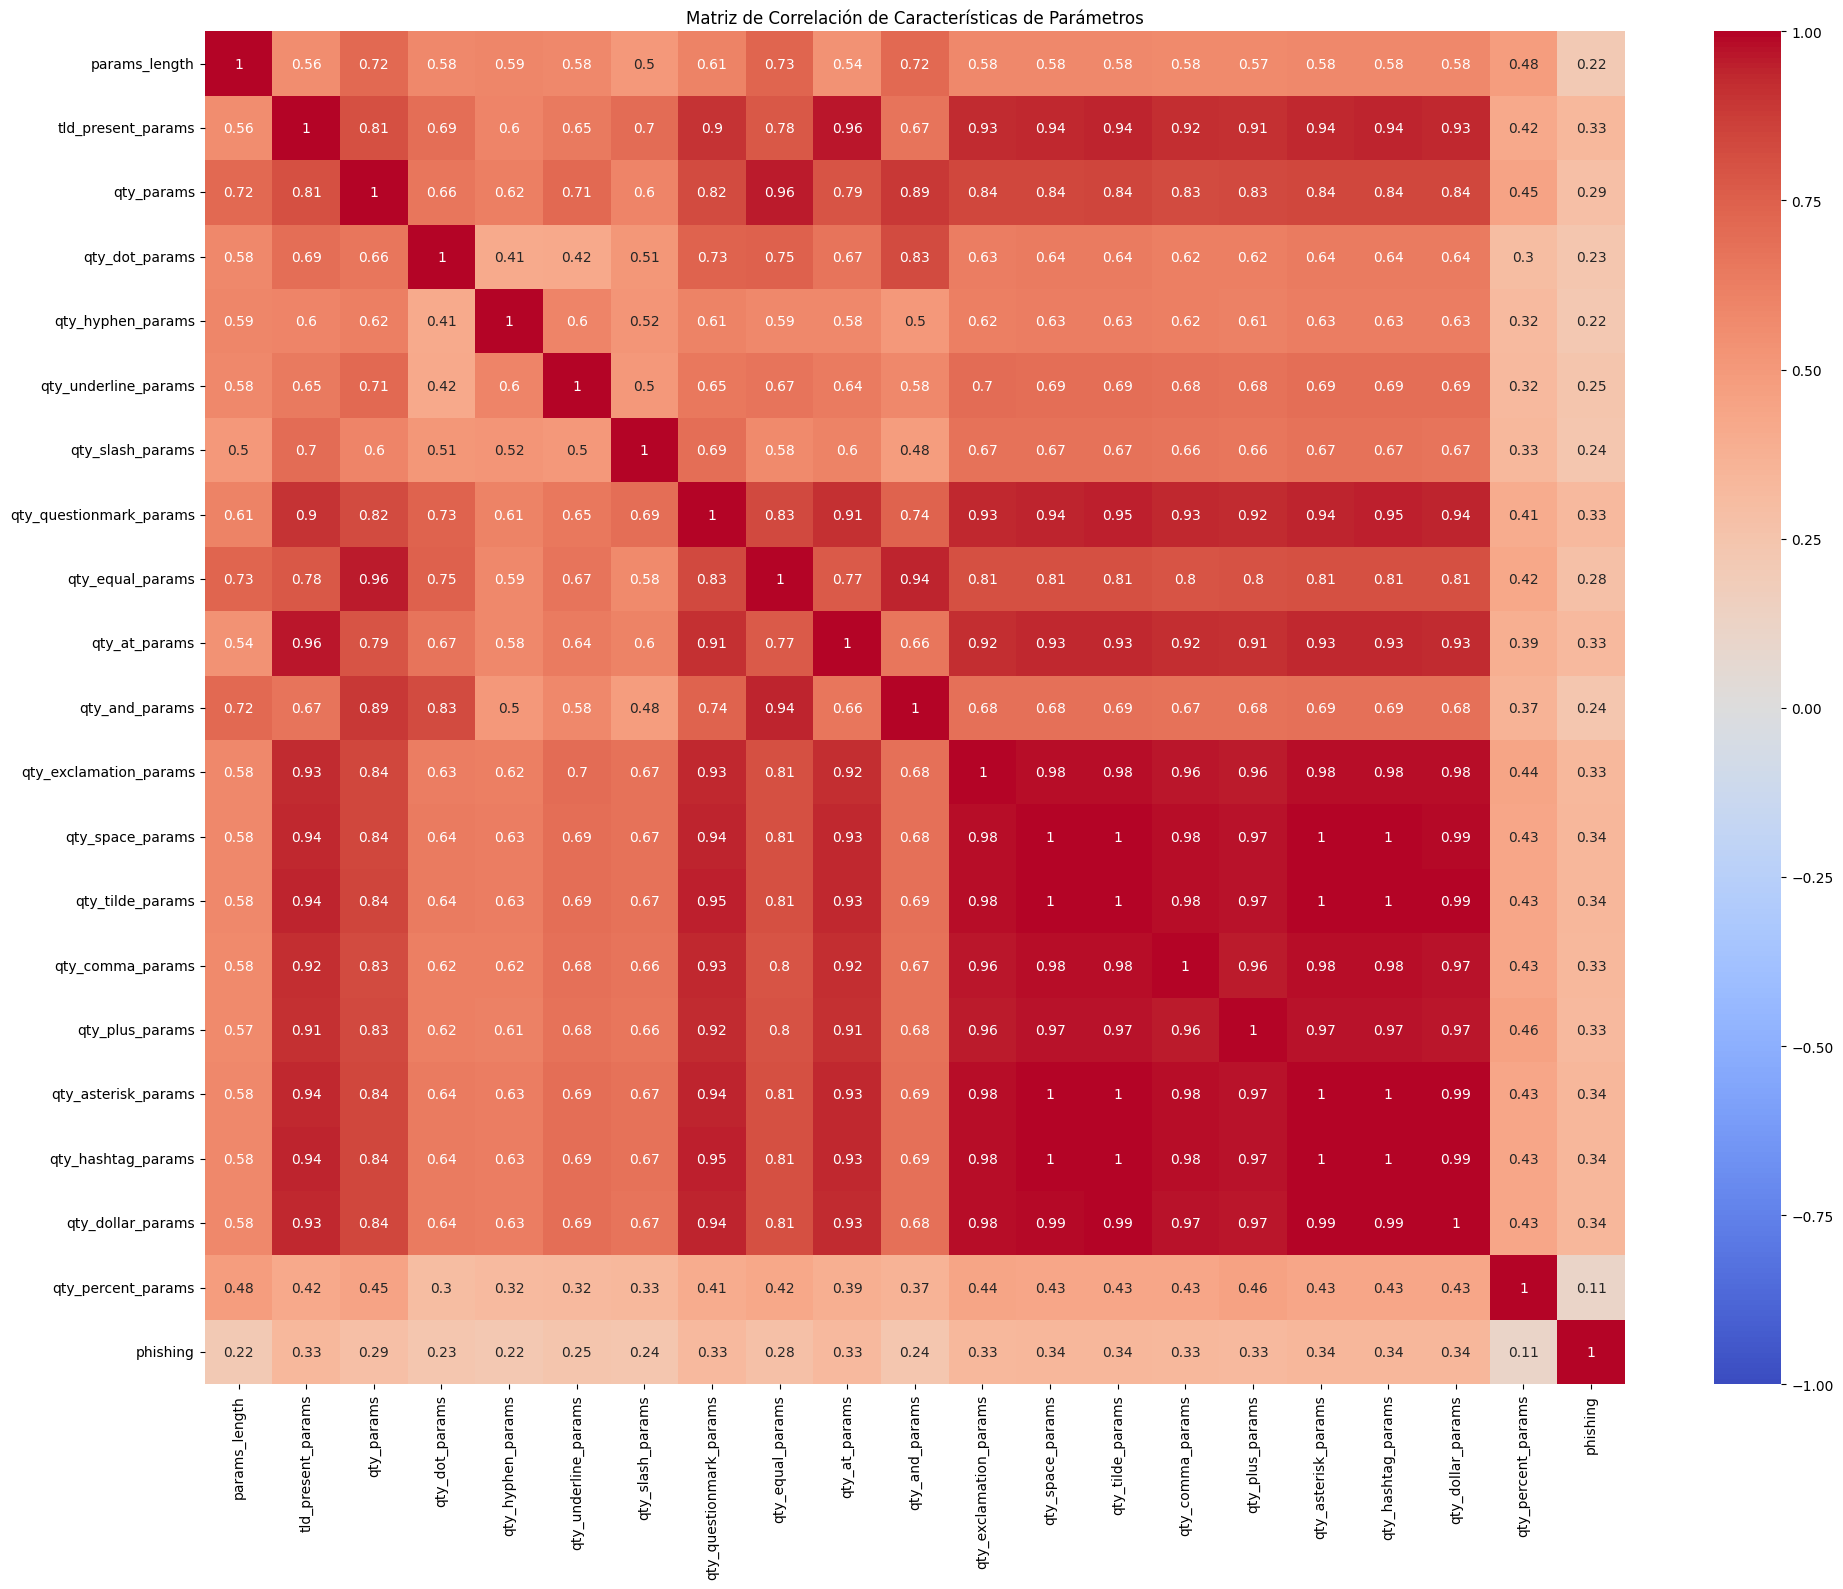

In [31]:
# Calcular y mostrar estadísticas descriptivas
print("Estadísticas para parámetros en URLs de Phishing:")
print(phishing[param_features].describe())
print("\nEstadísticas para parámetros en URLs No Phishing:")
print(non_phishing[param_features].describe())

# Matriz de correlación
corr_matrix = df[param_features + ['phishing']].corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación de Características de Parámetros')
plt.tight_layout()
plt.show()

Observaciones:

1. Params_length:

- Histograma: Mayor frecuencia de longitudes mayores en phishing, alta frecuencia de longitud cero en no phishing.
- Estadísticas: Media de 16.45 para phishing, con un máximo de 4094.
- Análisis: Las URLs de phishing tienden a tener parámetros más largos, posiblemente para ocultar información maliciosa o imitar URLs complejas legítimas.


2. Tld_present_params:

- Histograma: Alta frecuencia de -1 en no phishing, valores 0 y 1 más frecuentes en phishing.
- Estadísticas: Media de -0.71 para phishing.
- Análisis: Las URLs de phishing tienen más probabilidades de incluir TLDs en los parámetros, lo que podría ser un intento de confundir a los usuarios.


3. Qty_params:

- Histograma: Alta frecuencia de -1 en no phishing, distribución más variada en phishing (0 a 5).
- Estadísticas: Media de -0.37 para phishing, máximo de 23.
- Análisis: Las URLs de phishing tienden a usar más parámetros, posiblemente para hacer la URL más compleja o para transmitir información adicional.


4. Caracteres especiales en parámetros (dot, hyphen, underline, slash, questionmark, equal, at, and, exclamation, space, tilde, comma, plus, asterisk):

- Patrón general: Alta frecuencia de -1 en no phishing, distribución más variada y positiva en phishing.
- Estadísticas: Medias negativas para la mayoría, pero con máximos altos (por ejemplo, 35 para guiones, 43 para barras).
- Análisis: Las URLs de phishing utilizan una variedad más amplia de caracteres especiales en sus parámetros, posiblemente para ocultar información o imitar estructuras de URL complejas.

Conclusiones y recomendaciones:

1. Complejidad de parámetros: Crear una característica que mida la complejidad general de los parámetros, combinando longitud y uso de caracteres especiales.
2. Presencia de parámetros: Desarrollar una característica binaria que indique si la URL tiene parámetros o no.
3. TLD en parámetros: La presencia de TLD en parámetros parece ser un indicador potencial de phishing.
4. Cantidad de parámetros: El número de parámetros podría ser un buen predictor, con URLs de phishing tendiendo a usar más.
5. Uso de caracteres especiales: Crear características que capturen el uso inusual o excesivo de caracteres especiales en los parámetros.
6. Manejo de valores negativos: Los valores -1 parecen indicar ausencia de la característica. Considerar recodificar estos valores o tratarlos como una categoría separada.
7. Detección de anomalías: Implementar técnicas para identificar valores extremos en la longitud de los parámetros y en el uso de caracteres especiales.
8. Normalización: Considerar la normalización de características como params_length debido a su amplio rango de valores.

Analisis de otras características


In [32]:
# Otras características a examinar
other_features = ['email_in_url', 'time_response', 'domain_spf', 'asn_ip',
                  'time_domain_activation', 'time_domain_expiration', 'qty_ip_resolved',
                  'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
                  'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
                  'domain_google_index', 'url_shortened']

In [33]:
# Función para crear histogramas comparativos
def plot_histogram(feature):
    plt.figure(figsize=(10, 6))
    plt.hist(phishing[feature], bins=50, alpha=0.5, label='Phishing')
    plt.hist(non_phishing[feature], bins=50, alpha=0.5, label='No Phishing')
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

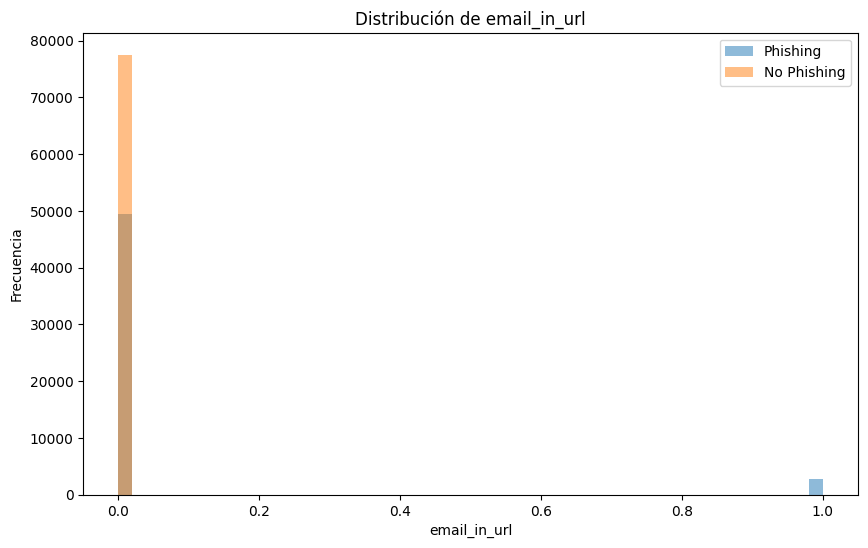

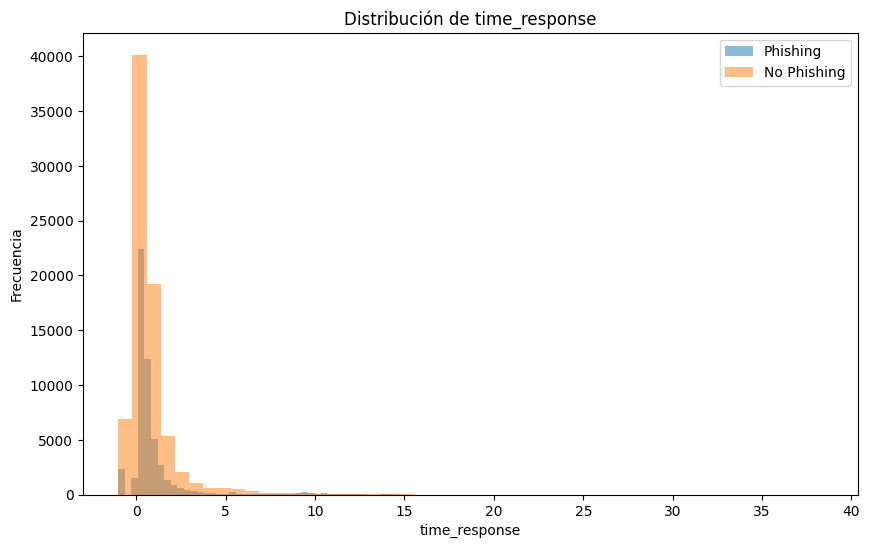

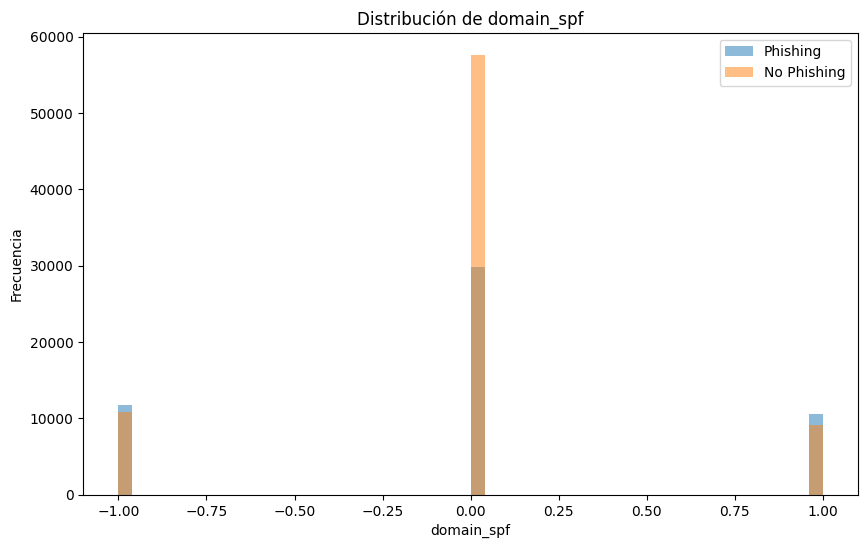

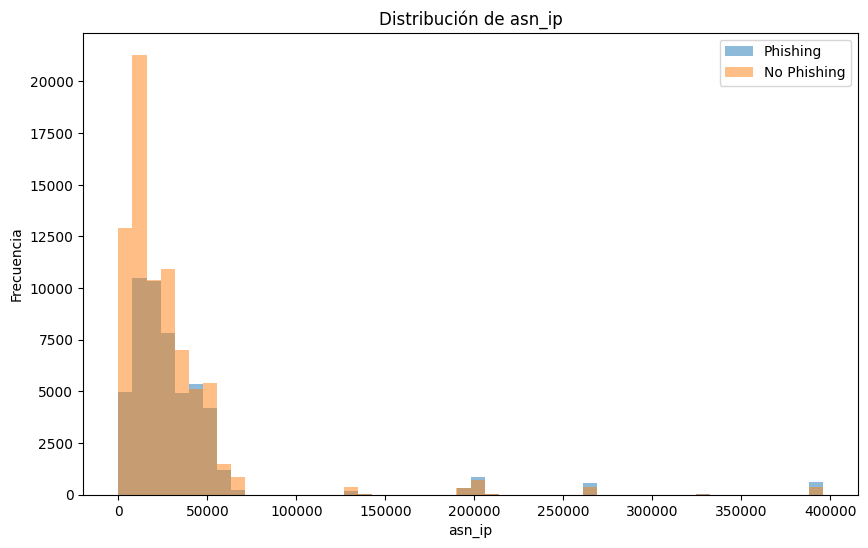

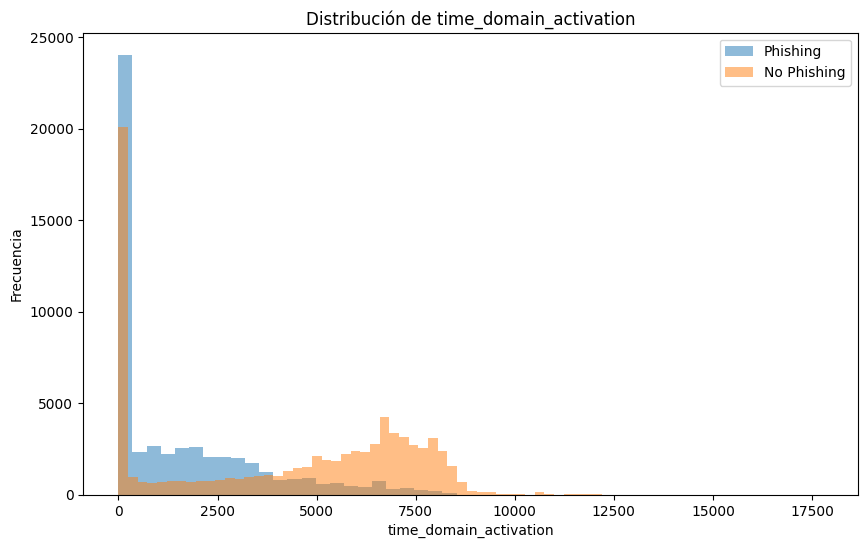

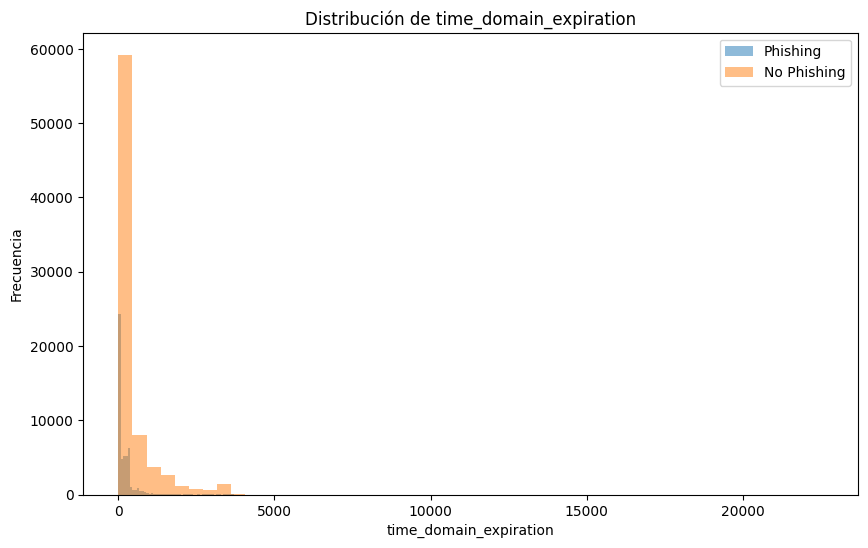

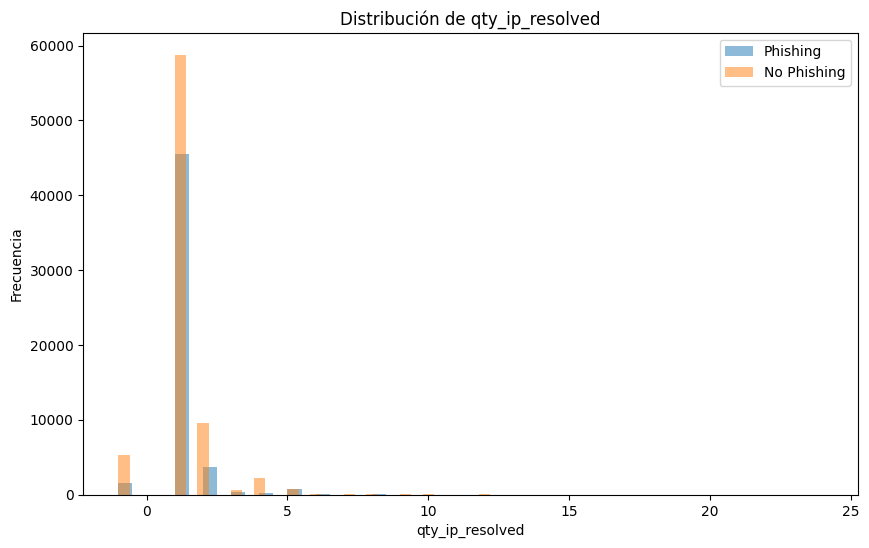

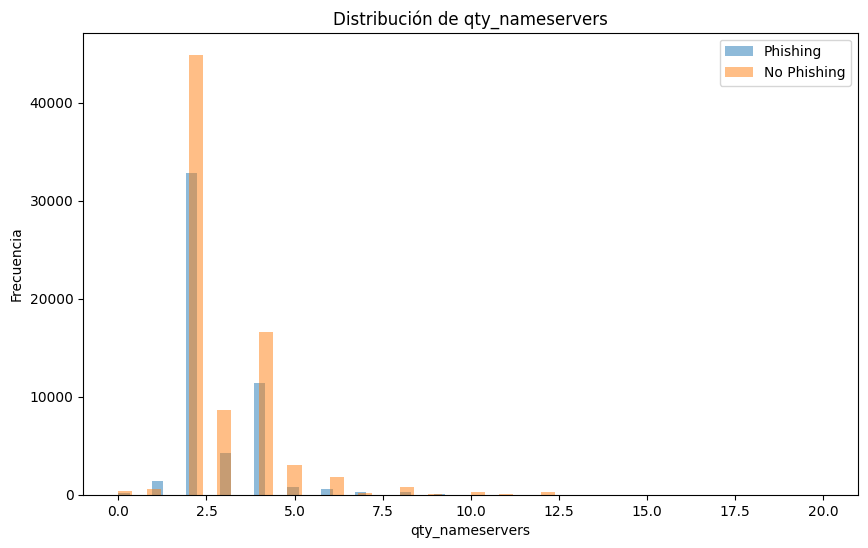

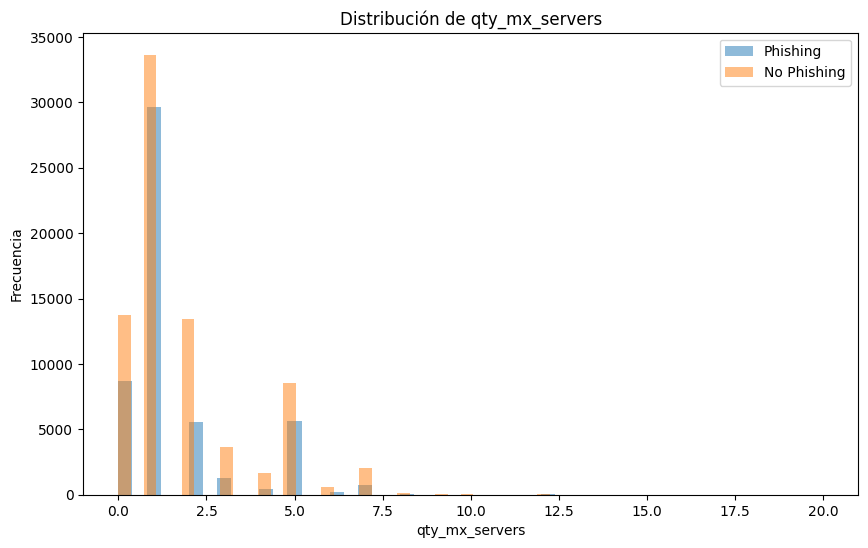

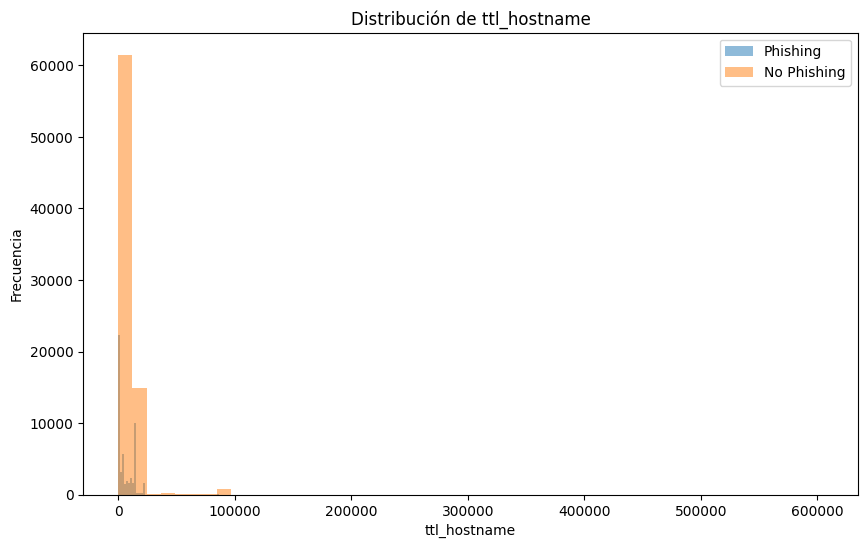

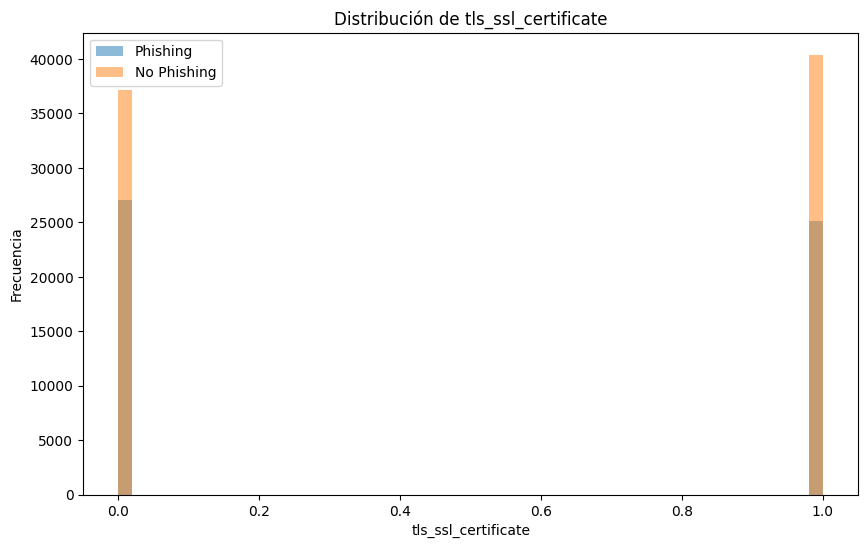

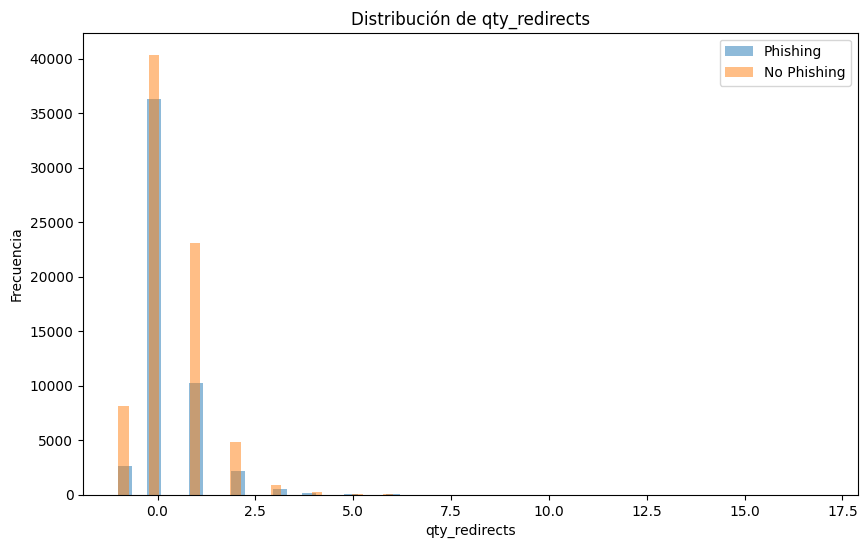

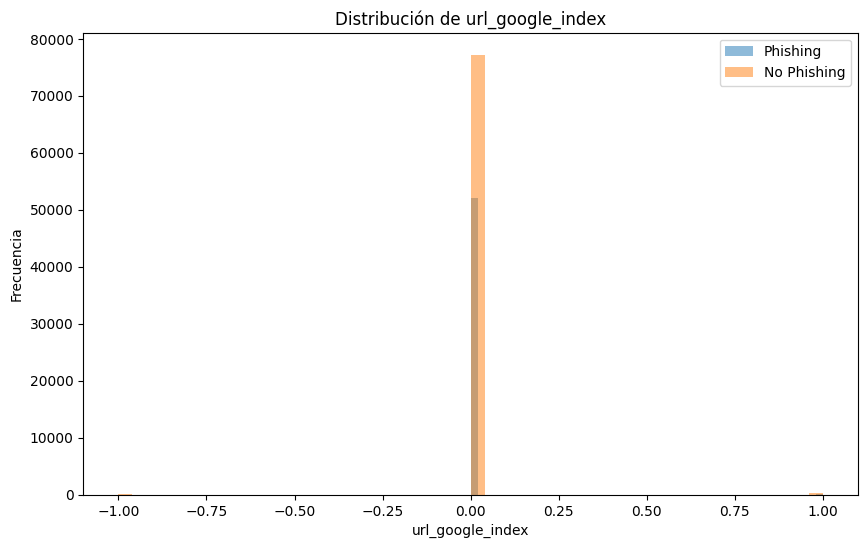

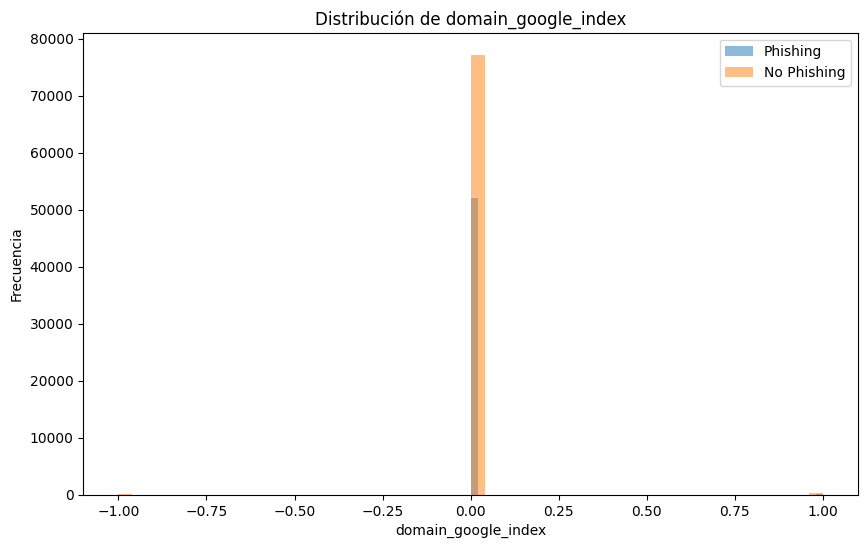

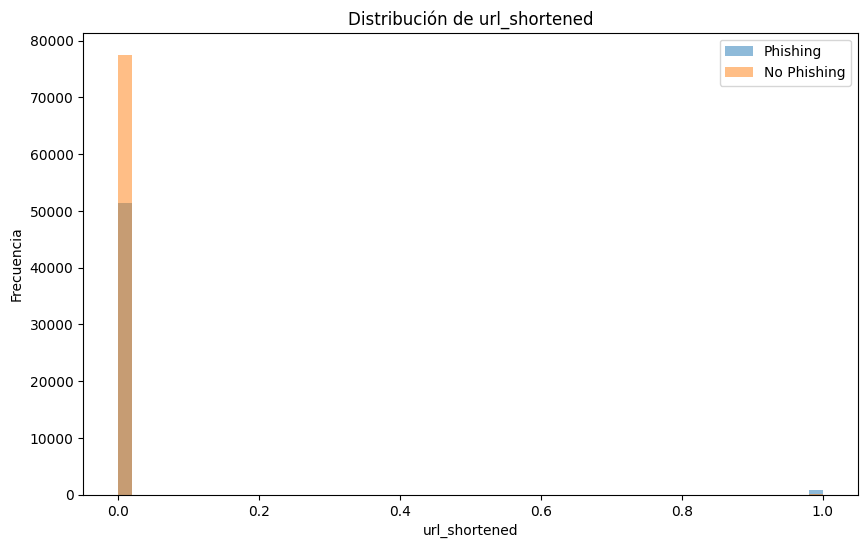

In [34]:
# Crear histogramas para cada característica
for feature in other_features:
    plot_histogram(feature)

In [35]:
# Calcular y mostrar estadísticas descriptivas
print("Estadísticas para URLs de Phishing:")
print(phishing[other_features].describe())
print("\nEstadísticas para URLs No Phishing:")
print(non_phishing[other_features].describe())


Estadísticas para URLs de Phishing:
       email_in_url  time_response    domain_spf         asn_ip  \
count  52152.000000   52152.000000  52152.000000   52152.000000   
mean       0.053037       0.857725     -0.022933   37026.385124   
std        0.224110       1.640401      0.653512   55286.296881   
min        0.000000      -1.000000     -1.000000      -1.000000   
25%        0.000000       0.247071      0.000000   15169.000000   
50%        0.000000       0.456813      0.000000   24446.000000   
75%        0.000000       0.853056      0.000000   41126.000000   
max        1.000000      17.247524      1.000000  395754.000000   

       time_domain_activation  time_domain_expiration  qty_ip_resolved  \
count            52152.000000            52152.000000     52152.000000   
mean              1538.553210              215.683195         1.101530   
std               1950.878479              386.474241         0.746161   
min                 -1.000000               -1.000000        -1.

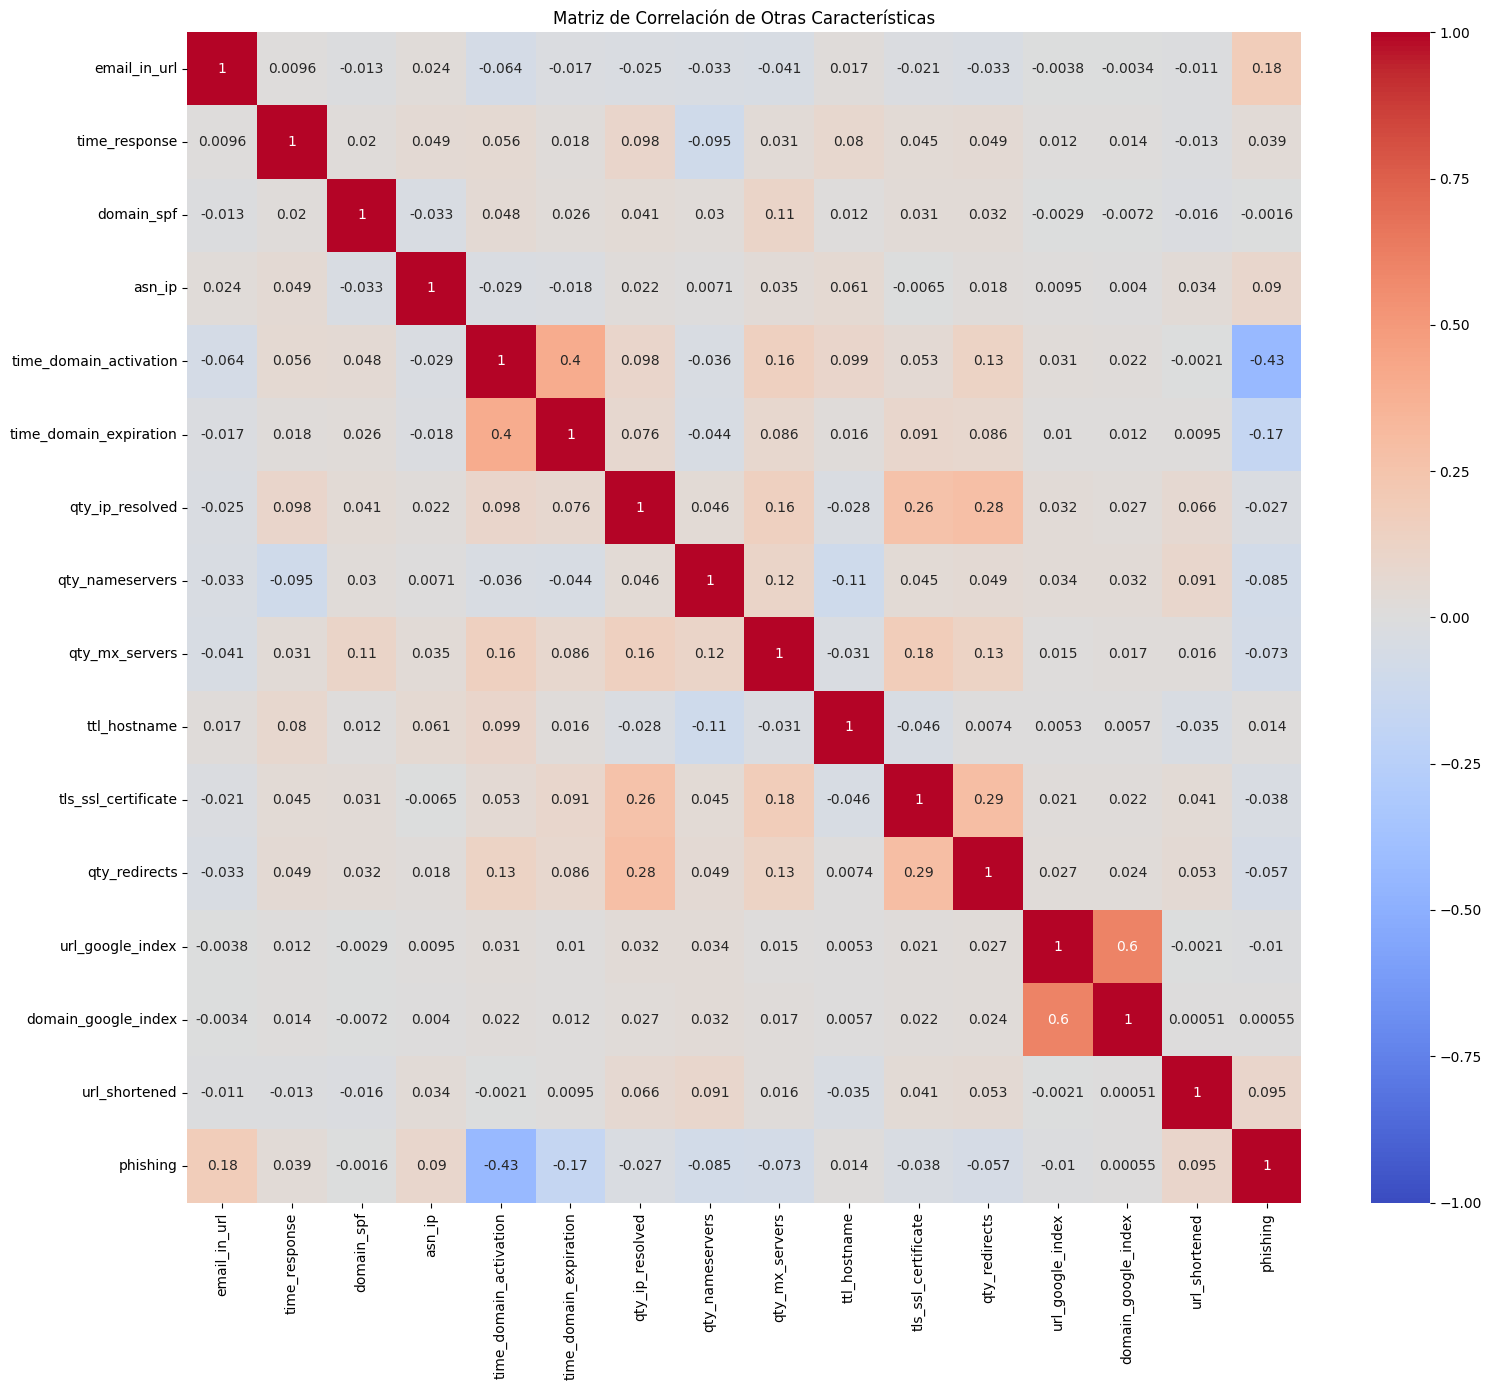

In [36]:
# Matriz de correlación
corr_matrix = df[other_features + ['phishing']].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación de Otras Características')
plt.tight_layout()
plt.show()

Observaciones:

1. email_in_url:

- Phishing: media de 0.053, máx de 1
- No Phishing: media de 0.000013, máx de 1
- Análisis: Las URLs de phishing tienen una probabilidad significativamente mayor de contener una dirección de correo electrónico.


2. time_response:

- Phishing: media de 0.858, máx de 17.25
- No Phishing: media de 0.739, máx de 38.40
- Análisis: Los tiempos de respuesta son ligeramente más altos para URLs de phishing, pero la diferencia no es muy grande.


3. domain_spf:

- Ambos grupos tienen medias cercanas a -0.02
- Análisis: No parece haber una diferencia significativa en la presencia de registros SPF entre URLs de phishing y no phishing.


4. asn_ip:

- Phishing: media de 37026, máx de 395754
- No Phishing: media de 28380, máx de 395593
- Análisis: Las URLs de phishing tienden a usar ASNs (Autonomous System Numbers) más altos en promedio.


5. time_domain_activation:

- Phishing: media de 1538 días, máx de 17775 días
- No Phishing: media de 4183 días, máx de 12210 días
- Análisis: Los dominios no phishing tienden a ser significativamente más antiguos.


6. time_domain_expiration:

- Phishing: media de 215 días, máx de 3718 días
- No Phishing: media de 413 días, máx de 22574 días
- Análisis: Los dominios no phishing tienden a tener períodos de expiración más largos.


7. qty_ip_resolved:

- Ambos grupos tienen medias cercanas a 1, pero el máximo para phishing (24) es mayor que para no phishing (19).
- Análisis: La mayoría de los dominios resuelven a una IP, pero algunos dominios de phishing resuelven a más IPs.


8 qty_nameservers y qty_mx_servers:

Ligeras diferencias, con no phishing teniendo valores ligeramente más altos en promedio.


9. tls_ssl_certificate:

- Phishing: media de 0.482
- No Phishing: media de 0.521
- Análisis: Sorprendentemente, la diferencia en la presencia de certificados SSL no es muy grande.


10. qty_redirects:

- Phishing: media de 0.277, máx de 17
- No Phishing: media de 0.369, máx de 12
- Análisis: Las URLs no phishing tienen ligeramente más redirecciones en promedio.


11. url_google_index y domain_google_index:

- Ambos tienen valores muy bajos para ambos grupos, con no phishing ligeramente más alto.
- Análisis: La indexación en Google no parece ser un fuerte diferenciador.


12. url_shortened:

- Phishing: media de 0.0156
- No Phishing: media de 0.000193
- Análisis: Las URLs de phishing tienen una probabilidad significativamente mayor de ser URLs acortadas.



Conclusiones y recomendaciones:

1. La presencia de email en la URL parece ser un fuerte indicador de phishing.
2. La edad del dominio (time_domain_activation) y el tiempo hasta la expiración son características importantes.
4. El uso de URLs acortadas es más común en phishing y podría ser un buen indicador.
5 .El ASN podría ser útil para identificar rangos de IP más propensos a ser utilizados para phishing.
5 .La presencia de certificados SSL no es tan diferenciadora como se podría esperar.
6 .Considerar crear características derivadas, como la relación entre tiempo de activación y expiración del dominio.
7. Investigar más a fondo los casos con múltiples IPs resueltas, especialmente para URLs de phishing.

Para el modelo, estas características, especialmente email_in_url, time_domain_activation, time_domain_expiration, y url_shortened, parecen ser potencialmente útiles para la detección de phishing.

VARIABLES A CODIFICAR

- domain_in_ip: Convertir a binaria (0 si es -1, 1 si es positivo).
- tld_present_params: Convertir a binaria (0 si es -1, 1 si es positivo).
- tls_ssl_certificate: Ya es binaria, asegurarse de que esté codificada como 0 y 1.
- Características con valores -1: Considerar recodificar -1 a 0 para qty_dot_file, qty_hyphen_file, y otras características similares.

In [37]:
# Para características donde -1 indica ausencia y ≥0 indica presencia:
def convert_to_binary(column):
    return (column >= 0).astype(int)

# Lista de columnas a convertir
columns_to_convert = ['tld_present_params', 'qty_dot_file', 'qty_hyphen_file', 
                      'qty_underline_file', 'qty_slash_file', 'qty_equal_file', 
                      'qty_at_file', 'domain_in_ip', 'qty_params']

# Aplicar la conversión
for col in columns_to_convert:
    df[f'{col}_binary'] = convert_to_binary(df[col])

In [38]:
# Para características donde queremos mantener el conteo, pero tratar -1 como 0
def replace_negative_with_zero(column):
    return column.clip(lower=0)

# Lista de columnas para reemplazar -1 con 0
columns_to_replace = ['qty_dot_file', 'qty_hyphen_file', 'qty_underline_file', 
                      'qty_slash_file', 'qty_equal_file', 'qty_at_file', 'qty_params']

# Aplicar el reemplazo
for col in columns_to_replace:
    df[f'{col}_modified'] = replace_negative_with_zero(df[col])

In [39]:
# Codificacion binaria y modificaciones de conteo

# Función para convertir a binario
def convert_to_binary(column):
    return (column >= 0).astype(int)

# Función para reemplazar negativos con cero
def replace_negative_with_zero(column):
    return column.clip(lower=0)

# Lista de columnas para conversión binaria
binary_columns = ['tld_present_params', 'domain_in_ip', 'qty_params']

# Lista de columnas para reemplazar -1 con 0
count_columns = ['qty_dot_file', 'qty_hyphen_file', 'qty_underline_file', 
                 'qty_slash_file', 'qty_equal_file', 'qty_at_file']

# Aplicar conversiones
for col in binary_columns:
    df[f'{col}_binary'] = convert_to_binary(df[col])

for col in count_columns:
    df[f'{col}_modified'] = replace_negative_with_zero(df[col])
    df[f'{col}_binary'] = convert_to_binary(df[col])

In [40]:
from sklearn.preprocessing import StandardScaler

# Normalización de características numéricas
# Lista de características numéricas para normalizar
numeric_features = ['length_url', 'domain_length', 'file_length', 'params_length', 'asn_ip']

# Crear y aplicar el escalador
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [41]:
# Manejo de valores atipicos
def clip_outliers(column, lower_percentile=1, upper_percentile=99):
    lower = np.percentile(column, lower_percentile)
    upper = np.percentile(column, upper_percentile)
    return column.clip(lower, upper)

# Aplicar recorte a columnas específicas
columns_to_clip = ['qty_redirects', 'time_response']
for col in columns_to_clip:
    df[f'{col}_clipped'] = clip_outliers(df[col])

In [42]:
# Función para manejar valores negativos o cero en el log
def safe_log1p(x):
    return np.log1p(np.maximum(x, 0))

# Aplicar transformación logarítmica de manera segura
df['time_domain_activation_log'] = safe_log1p(df['time_domain_activation'])
df['time_domain_expiration_log'] = safe_log1p(df['time_domain_expiration'])

   tld_present_params_binary  qty_dot_file_modified  qty_dot_file_binary  \
0                          0                      0                    1   
1                          0                      0                    1   
2                          0                      0                    0   
3                          0                      0                    1   
4                          0                      0                    0   

   length_url  qty_redirects_clipped  time_domain_activation_log  \
0   -0.524329                     -1                    7.403061   
1    5.824448                      1                    0.000000   
2   -0.303327                      1                    8.585973   
3   -0.323418                      0                    0.000000   
4   -0.323418                      1                    8.970305   

   time_domain_expiration_log  
0                    6.313548  
1                    0.000000  
2                    4.820282  
3     

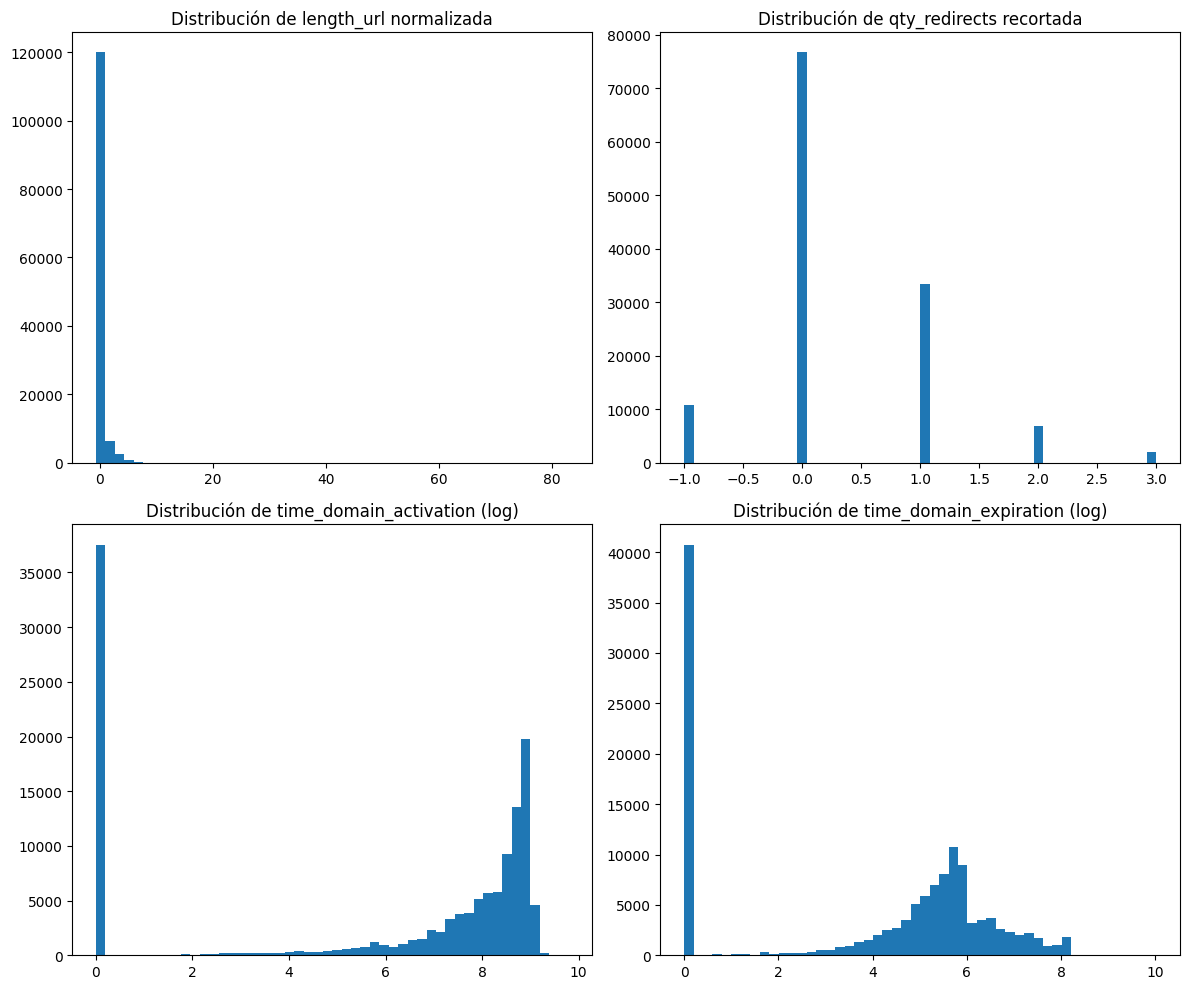

In [43]:
# Verificar las nuevas columnas
print(df[['tld_present_params_binary', 'qty_dot_file_modified', 'qty_dot_file_binary', 
          'length_url', 'qty_redirects_clipped', 'time_domain_activation_log', 
          'time_domain_expiration_log']].head())

# Verificar estadísticas descriptivas de las características modificadas
print(df[['length_url', 'qty_redirects_clipped', 'time_domain_activation_log', 'time_domain_expiration_log']].describe())

# Visualizar distribuciones
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.hist(df['length_url'].dropna(), bins=50)
plt.title('Distribución de length_url normalizada')

plt.subplot(2, 2, 2)
plt.hist(df['qty_redirects_clipped'].dropna(), bins=50)
plt.title('Distribución de qty_redirects recortada')

plt.subplot(2, 2, 3)
plt.hist(df['time_domain_activation_log'].dropna(), bins=50)
plt.title('Distribución de time_domain_activation (log)')

plt.subplot(2, 2, 4)
plt.hist(df['time_domain_expiration_log'].dropna(), bins=50)
plt.title('Distribución de time_domain_expiration (log)')

plt.tight_layout()
plt.show()

In [44]:
%store df

Stored 'df' (DataFrame)


C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\IPython\extensions\storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/df requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


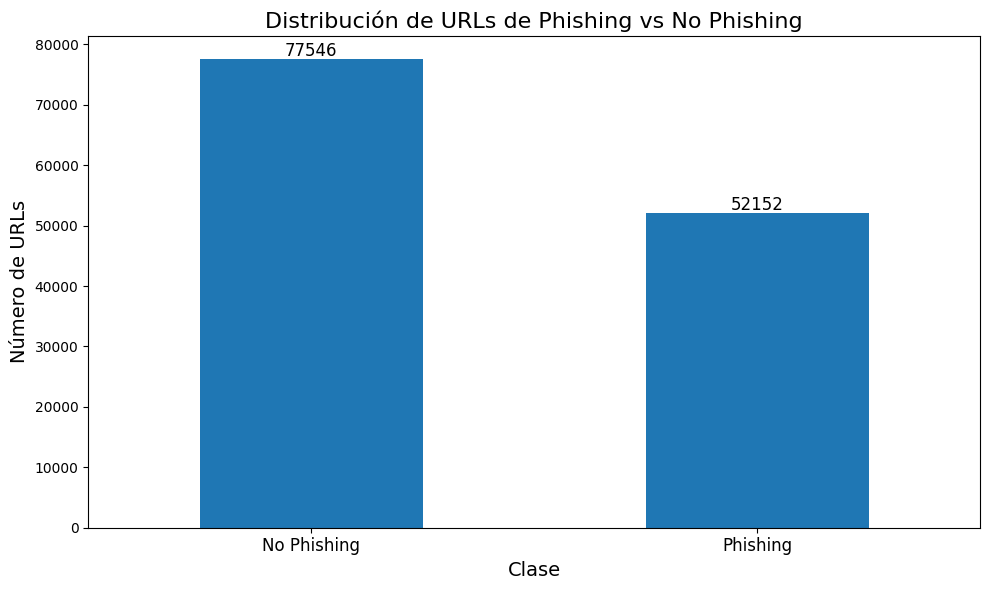

In [45]:
import matplotlib.pyplot as plt

# Contar el número de instancias de cada clase
phishing_count = df['phishing'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
phishing_count.plot(kind='bar')

# Personalizar el gráfico
plt.title('Distribución de URLs de Phishing vs No Phishing', fontsize=16)
plt.xlabel('Clase', fontsize=14)
plt.ylabel('Número de URLs', fontsize=14)
plt.xticks([0, 1], ['No Phishing', 'Phishing'], rotation=0, fontsize=12)

# Añadir etiquetas de valor en las barras
for i, v in enumerate(phishing_count):
    plt.text(i, v + 500, str(v), ha='center', fontsize=12)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()